# Question 4: “What patterns can be uncovered in subpopulations based on age, sex, and BMI?”

## Importing Python libraries and the Initial Dataset

### Importing Python libraries

### Importing the cleaned one hot encoded dataset from desktop folder

In [1]:
#%pip install pandas mlxtend matplotlib seaborn
#%pip install imbalanced-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
def read_csv_file(file_path):
    """
    Read a CSV file into a pandas DataFrame.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pandas.DataFrame: The DataFrame containing the data from the CSV file.
    """
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    return df

# Specify the file path
file_path = 'C:/Users/steph/OneDrive/Desktop/Diabetes/archive/diabetes_012_health_indicators_BRFSS2015_cleaned_encoded.csv'

# Read the CSV file into a pandas DataFrame
df = read_csv_file(file_path)

# Display the DataFrame
display(df.head())

HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1       1       0                     0   
1       0         0          0       1       0                     0   
2       1         1          1       0       0                     0   
3       1         0          1       0       0                     0   
4       1         1          1       0       0                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  ...  \
0             0       0        1                  0  ...   
1             1       0        0                  0  ...   
2             0       1        0                  0  ...   
3             1       1        1                  0  ...   
4             1       1        1                  0  ...   

   Education_Some college or technical school  Education_College graduate  \
0                                           0                           0   
1                                           0                           1   
2                                           0                           0   
3                                           0                           0   
4                                           1                           0   

   Income_Less than $10,000  Income_$10,000-$14,999  Income_$15,000-$19,999  \
0                         0                       0                       1   
1                         1                       0                       0   
2                         0                       0                       0   
3                         0                       0                       0   
4                         0                       0                       0   

   Income_$20,000-$24,999  Income_$25,000-$34,999  Income_$35,000-$49,999  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       1   
4                       1                       0                       0   

   Income_$50,000-$74,999  Income_$75,000 or more  
0                       0                       0  
1                       0                       0  
2                       0                       1  
3                       0                       0  
4                       0                       0  

[5 rows x 69 columns]

In [3]:
#list of columns
df.columns


Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex',
       'diabetes_0', 'diabetes_1', 'diabetes_2', 'BMI_Underweight',
       'BMI_Healthy weight', 'BMI_Overweight', 'BMI_Class 1 Obesity',
       'BMI_Class 2 Obesity', 'BMI_Class 3 Obesity', 'GenHlth_Excellent',
       'GenHlth_Very good', 'GenHlth_Good', 'GenHlth_Fair', 'GenHlth_Poor',
       'MentHlth_0', 'MentHlth_1-5', 'MentHlth_6-10', 'MentHlth_11-15',
       'MentHlth_16-20', 'MentHlth_21-25', 'MentHlth_26-30', 'PhysHlth_0',
       'PhysHlth_1-5', 'PhysHlth_6-10', 'PhysHlth_11-15', 'PhysHlth_16-20',
       'PhysHlth_21-25', 'PhysHlth_26-30', 'Age_18-24', 'Age_25-29',
       'Age_30-34', 'Age_35-39', 'Age_40-44', 'Age_45-49', 'Age_50-54',
       'Age_55-59', 'Age_60-64', 'Age_65-69', 'Age_70-74', 'Age_75-79',
       'Age_80 or older',
       'Education_Never attended school o

## Prepare Data for Principle Component Analysis

### One Hot Encoding Sex Column

In [4]:
#One hot encoding of the Sex column
df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first=False)

# Convert the boolean values in the Age columns to integers (0/1)
df_encoded['Sex_0'] = df_encoded['Sex_0'].astype(int)
df_encoded['Sex_1'] = df_encoded['Sex_1'].astype(int)

#Rename columns to be morre descriptive
df_encoded.rename(columns = {'Sex_0': 'Sex_Female', 'Sex_1': 'Sex_Male'}, inplace = True)

# Show the result
display(df_encoded.head())

HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1       1       0                     0   
1       0         0          0       1       0                     0   
2       1         1          1       0       0                     0   
3       1         0          1       0       0                     0   
4       1         1          1       0       0                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  ...  \
0             0       0        1                  0  ...   
1             1       0        0                  0  ...   
2             0       1        0                  0  ...   
3             1       1        1                  0  ...   
4             1       1        1                  0  ...   

   Income_Less than $10,000  Income_$10,000-$14,999  Income_$15,000-$19,999  \
0                         0                       0                       1   
1                         1                       0                       0   
2                         0                       0                       0   
3                         0                       0                       0   
4                         0                       0                       0   

   Income_$20,000-$24,999  Income_$25,000-$34,999  Income_$35,000-$49,999  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       1   
4                       1                       0                       0   

   Income_$50,000-$74,999  Income_$75,000 or more  Sex_Female  Sex_Male  
0                       0                       0           1         0  
1                       0                       0           1         0  
2                       0                       1           1         0  
3                       0                       0           1         0  
4                       0                       0           1         0  

[5 rows x 70 columns]

In [5]:
#Display all distinct values from the dataset for each column
for column in df_encoded.columns:
    print(column, df_encoded[column].unique())

HighBP [1 0]
HighChol [1 0]
CholCheck [1 0]
Smoker [1 0]
Stroke [0 1]
HeartDiseaseorAttack [0 1]
PhysActivity [0 1]
Fruits [0 1]
Veggies [1 0]
HvyAlcoholConsump [0 1]
AnyHealthcare [1 0]
NoDocbcCost [0 1]
DiffWalk [1 0]
diabetes_0 [1 0]
diabetes_1 [0 1]
diabetes_2 [0 1]
BMI_Underweight [0 1]
BMI_Healthy weight [0 1]
BMI_Overweight [0 1]
BMI_Class 1 Obesity [0 1]
BMI_Class 2 Obesity [0 1]
BMI_Class 3 Obesity [1 0]
GenHlth_Excellent [0 1]
GenHlth_Very good [0 1]
GenHlth_Good [0 1]
GenHlth_Fair [0 1]
GenHlth_Poor [1 0]
MentHlth_0 [0 1]
MentHlth_1-5 [0 1]
MentHlth_6-10 [0 1]
MentHlth_11-15 [0 1]
MentHlth_16-20 [1 0]
MentHlth_21-25 [0 1]
MentHlth_26-30 [0 1]
PhysHlth_0 [0 1]
PhysHlth_1-5 [0 1]
PhysHlth_6-10 [0 1]
PhysHlth_11-15 [1 0]
PhysHlth_16-20 [0 1]
PhysHlth_21-25 [0 1]
PhysHlth_26-30 [0 1]
Age_18-24 [0 1]
Age_25-29 [0 1]
Age_30-34 [0 1]
Age_35-39 [0 1]
Age_40-44 [0 1]
Age_45-49 [0 1]
Age_50-54 [0 1]
Age_55-59 [0 1]
Age_60-64 [1 0]
Age_65-69 [0 1]
Age_70-74 [0 1]
Age_75-79 [0 1]
Age_80

### Adjusting categories and creating new dataframes with feature subsets

#### Group age categories into four bins: 18-29, 30-49, 50-64, 65+

In [6]:
#Combine age columns into one colum and rename it Age_18-29
df_encoded['Age_18-29'] = df_encoded['Age_18-24'] + df_encoded['Age_25-29']
df_encoded.drop(['Age_18-24', 'Age_25-29'], axis=1, inplace=True)

#Combine age columns into one colum and rename it Age_30-49
df_encoded['Age_30-49'] = df_encoded['Age_30-34'] + df_encoded['Age_35-39'] + df_encoded['Age_40-44'] + df_encoded['Age_45-49']
df_encoded.drop(['Age_30-34', 'Age_35-39', 'Age_40-44', 'Age_45-49'], axis=1, inplace=True)

#Combine age columns into one colum and rename it Age_50-64
df_encoded['Age_50-64'] = df_encoded['Age_50-54'] + df_encoded['Age_55-59'] + df_encoded['Age_60-64']
df_encoded.drop(['Age_50-54', 'Age_55-59', 'Age_60-64'], axis=1, inplace=True)

#Combine age columns into one colum and rename it Age_65+
df_encoded['Age_65+'] = df_encoded['Age_65-69'] + df_encoded['Age_70-74'] + df_encoded['Age_75-79'] + df_encoded['Age_80 or older']
df_encoded.drop(['Age_65-69', 'Age_70-74', 'Age_75-79', 'Age_80 or older'], axis=1, inplace=True)

#list columns
df_encoded.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk',
       'diabetes_0', 'diabetes_1', 'diabetes_2', 'BMI_Underweight',
       'BMI_Healthy weight', 'BMI_Overweight', 'BMI_Class 1 Obesity',
       'BMI_Class 2 Obesity', 'BMI_Class 3 Obesity', 'GenHlth_Excellent',
       'GenHlth_Very good', 'GenHlth_Good', 'GenHlth_Fair', 'GenHlth_Poor',
       'MentHlth_0', 'MentHlth_1-5', 'MentHlth_6-10', 'MentHlth_11-15',
       'MentHlth_16-20', 'MentHlth_21-25', 'MentHlth_26-30', 'PhysHlth_0',
       'PhysHlth_1-5', 'PhysHlth_6-10', 'PhysHlth_11-15', 'PhysHlth_16-20',
       'PhysHlth_21-25', 'PhysHlth_26-30',
       'Education_Never attended school or only kindergarten',
       'Education_Elementary', 'Education_Some high school',
       'Education_High school graduate',
       'Education_Some college or technical school',
       'Education_College 

In [7]:
#Drop the diabetes columns 
df_sample = df_encoded.drop(['diabetes_0', 'diabetes_1', 'diabetes_2'], axis=1)

### Create Subsets for Ages 18-29 Male/Female, further subdivided by BMI category

In [8]:
# Filter data for Age 18-29, Male, BMI_Underweight
subset_18_29_male_underweight = df_sample[(df_sample['Age_18-29'] == 1) & (['Sex_Male'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age 18-29, Female, BMI_Underweight
subset_18_29_female_underweight = df_sample[(df_sample['Age_18-29'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age 18-29, Male, BMI_Healthy weight
subset_18_29_male_healthy_weight = df_sample[(df_sample['Age_18-29'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age 18-29, Female, BMI_Healthy weight
subset_18_29_female_healthy_weight = df_sample[(df_sample['Age_18-29'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age 18-29, Male, BMI_Overweight
subset_18_29_male_overweight = df_sample[(df_sample['Age_18-29'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Overweight'] == 1)]

# Filter data for Age 18-29, Female, BMI_Overweight
subset_18_29_female_overweight = df_sample[(df_sample['Age_18-29'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Overweight'] == 1)]

# Filter data for Age 18-29, Male, BMI_Class 1 Obesity
subset_18_29_male_obesity_1 = df_sample[(df_sample['Age_18-29'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Class 1 Obesity'] == 1)]

# Filter data for Age 18-29, Female, BMI_Class 1 Obesity
subset_18_29_female_obesity_1 = df_sample[(df_sample['Age_18-29'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Class 1 Obesity'] == 1)]

# Filter data for Age 18-29, Male, BMI_Class 2 Obesity
subset_18_29_male_obesity_2 = df_sample[(df_sample['Age_18-29'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Class 2 Obesity'] == 1)]

# Filter data for Age 18-29, Female, BMI_Class 2 Obesity
subset_18_29_female_obesity_2 = df_sample[(df_sample['Age_18-29'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Class 2 Obesity'] == 1)]

# Filter data for Age 18-29, Male, BMI_Class 3 Obesity
subset_18_29_male_obesity_3 = df_sample[(df_sample['Age_18-29'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Class 3 Obesity'] == 1)]

# Filter data for Age 18-29, Female, BMI_Class 3 Obesity
subset_18_29_female_obesity_3 = df_sample[(df_sample['Age_18-29'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Class 3 Obesity'] == 1)]

### Create Subsets for Ages 30-49 Male/Female, further subdivided by BMI category

In [9]:
# Filter data for Age_30-49, Male, BMI_Underweight
subset_30_49_male_underweight = df_sample[(df_sample['Age_30-49'] == 1) & (['Sex_Male'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age_30-49, Female, BMI_Underweight
subset_30_49_female_underweight = df_sample[(df_sample['Age_30-49'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age_30-49, Male, BMI_Healthy weight
subset_30_49_male_healthy_weight = df_sample[(df_sample['Age_30-49'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age_30-49, Female, BMI_Healthy weight
subset_30_49_female_healthy_weight = df_sample[(df_sample['Age_30-49'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age_30-49, Male, BMI_Overweight
subset_30_49_male_overweight = df_sample[(df_sample['Age_30-49'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Overweight'] == 1)]

# Filter data for Age_30-49, Female, BMI_Overweight
subset_30_49_female_overweight = df_sample[(df_sample['Age_30-49'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Overweight'] == 1)]

# Filter data for Age_30-49, Male, BMI_Class 1 Obesity
subset_30_49_male_obesity_1 = df_sample[(df_sample['Age_30-49'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Class 1 Obesity'] == 1)]

# Filter data for Age_30-49, Female, BMI_Class 1 Obesity
subset_30_49_female_obesity_1 = df_sample[(df_sample['Age_30-49'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Class 1 Obesity'] == 1)]

# Filter data for Age_30-49, Male, BMI_Class 2 Obesity
subset_30_49_male_obesity_2 = df_sample[(df_sample['Age_30-49'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Class 2 Obesity'] == 1)]

# Filter data for Age_30-49, Female, BMI_Class 2 Obesity
subset_30_49_female_obesity_2 = df_sample[(df_sample['Age_30-49'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Class 2 Obesity'] == 1)]

# Filter data for Age_30-49, Male, BMI_Class 3 Obesity
subset_30_49_male_obesity_3 = df_sample[(df_sample['Age_30-49'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Class 3 Obesity'] == 1)]

# Filter data for Age_30-49, Female, BMI_Class 3 Obesity
subset_30_49_female_obesity_3 = df_sample[(df_sample['Age_30-49'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Class 3 Obesity'] == 1)]

### Create Subsets for Ages 50-64 Male/Female, further subdivided by BMI category

In [10]:
# Filter data for Age_50-64, Male, BMI_Underweight
subset_50_64_male_underweight = df_sample[(df_sample['Age_50-64'] == 1) & (['Sex_Male'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age_50-64, Female, BMI_Underweight
subset_50_64_female_underweight = df_sample[(df_sample['Age_50-64'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age_50-64, Male, BMI_Healthy weight
subset_50_64_male_healthy_weight = df_sample[(df_sample['Age_50-64'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age_50-64, Female, BMI_Healthy weight
subset_50_64_female_healthy_weight = df_sample[(df_sample['Age_50-64'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age_50-64, Male, BMI_Overweight
subset_50_64_male_overweight = df_sample[(df_sample['Age_50-64'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Overweight'] == 1)]

# Filter data for Age_50-64, Female, BMI_Overweight
subset_50_64_female_overweight = df_sample[(df_sample['Age_50-64'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Overweight'] == 1)]

# Filter data for Age_50-64, Male, BMI_Class 1 Obesity
subset_50_64_male_obesity_1 = df_sample[(df_sample['Age_50-64'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Class 1 Obesity'] == 1)]

# Filter data for Age_50-64, Female, BMI_Class 1 Obesity
subset_50_64_female_obesity_1 = df_sample[(df_sample['Age_50-64'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Class 1 Obesity'] == 1)]

# Filter data for Age_50-64, Male, BMI_Class 2 Obesity
subset_50_64_male_obesity_2 = df_sample[(df_sample['Age_50-64'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Class 2 Obesity'] == 1)]

# Filter data for Age_50-64, Female, BMI_Class 2 Obesity
subset_50_64_female_obesity_2 = df_sample[(df_sample['Age_50-64'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Class 2 Obesity'] == 1)]

# Filter data for Age_50-64, Male, BMI_Class 3 Obesity
subset_50_64_male_obesity_3 = df_sample[(df_sample['Age_50-64'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Class 3 Obesity'] == 1)]

# Filter data for Age_50-64, Female, BMI_Class 3 Obesity
subset_50_64_female_obesity_3 = df_sample[(df_sample['Age_50-64'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Class 3 Obesity'] == 1)]

### Create Subsets for Ages 65+ Male/Female, further subdivided by BMI category

In [11]:
# Filter data for Age_65+, Male, BMI_Underweight
subset_65_plus_male_underweight = df_sample[(df_sample['Age_65+'] == 1) & (['Sex_Male'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age_65+, Female, BMI_Underweight
subset_65_plus_female_underweight = df_sample[(df_sample['Age_65+'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age_65+, Male, BMI_Healthy weight
subset_65_plus_male_healthy_weight = df_sample[(df_sample['Age_65+'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age_65+, Female, BMI_Healthy weight
subset_65_plus_female_healthy_weight = df_sample[(df_sample['Age_65+'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Healthy weight'] == 1)]

# Filter data for Age_65+, Male, BMI_Overweight
subset_65_plus_male_overweight = df_sample[(df_sample['Age_65+'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Overweight'] == 1)]

# Filter data for Age_65+, Female, BMI_Overweight
subset_65_plus_female_overweight = df_sample[(df_sample['Age_65+'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Overweight'] == 1)]

# Filter data for Age_65+, Male, BMI_Class 1 Obesity
subset_65_plus_male_obesity_1 = df_sample[(df_sample['Age_65+'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Class 1 Obesity'] == 1)]

# Filter data for Age_65+, Female, BMI_Class 1 Obesity
subset_65_plus_female_obesity_1 = df_sample[(df_sample['Age_65+'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Class 1 Obesity'] == 1)]

# Filter data for Age_65+, Male, BMI_Class 2 Obesity
subset_65_plus_male_obesity_2 = df_sample[(df_sample['Age_65+'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Class 2 Obesity'] == 1)]

# Filter data for Age_65+, Female, BMI_Class 2 Obesity
subset_65_plus_female_obesity_2 = df_sample[(df_sample['Age_65+'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Class 2 Obesity'] == 1)]

# Filter data for Age_65+, Male, BMI_Class 3 Obesity
subset_65_plus_male_obesity_3 = df_sample[(df_sample['Age_65+'] == 1) & (df_sample['Sex_Male'] == 1) & (df_sample['BMI_Class 3 Obesity'] == 1)]

# Filter data for Age_65+, Female, BMI_Class 3 Obesity
subset_65_plus_female_obesity_3 = df_sample[(df_sample['Age_65+'] == 1) & (df_sample['Sex_Female'] == 1) & (df_sample['BMI_Class 3 Obesity'] == 1)]

### Apply PCA on Subsets

In [12]:
# Function to apply PCA on a subset
def apply_pca(subset_data, n_components=2):
    # Standardize the data (important for PCA)
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(subset_data)

    # Apply PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(standardized_data)

    # Combine results into a DataFrame
    pca_result = pd.DataFrame(data=principal_components, 
                              columns=[f"PC{i+1}" for i in range(n_components)])
    explained_variance = pca.explained_variance_ratio_

    return pca_result, explained_variance

Create a List Containing Subsets

In [13]:
subsets = [
    subset_18_29_male_underweight,
    subset_18_29_female_underweight,
    subset_18_29_male_healthy_weight,
    subset_18_29_female_healthy_weight,
    subset_18_29_male_overweight,
    subset_18_29_female_overweight,
    subset_18_29_male_obesity_1,
    subset_18_29_female_obesity_1,
    subset_18_29_male_obesity_2,
    subset_18_29_female_obesity_2,
    subset_18_29_male_obesity_3,
    subset_18_29_female_obesity_3, 
    subset_30_49_male_underweight,
    subset_30_49_female_underweight,
    subset_30_49_male_healthy_weight,
    subset_30_49_female_healthy_weight,
    subset_30_49_male_overweight,
    subset_30_49_female_overweight,
    subset_30_49_male_obesity_1,
    subset_30_49_female_obesity_1,
    subset_30_49_male_obesity_2,
    subset_30_49_female_obesity_2,
    subset_30_49_male_obesity_3,
    subset_30_49_female_obesity_3,
    subset_50_64_male_underweight,
    subset_50_64_female_underweight,
    subset_50_64_male_healthy_weight,
    subset_50_64_female_healthy_weight,
    subset_50_64_male_overweight,
    subset_50_64_female_overweight,
    subset_50_64_male_obesity_1,
    subset_50_64_female_obesity_1,
    subset_50_64_male_obesity_2,
    subset_50_64_female_obesity_2,
    subset_50_64_male_obesity_3,
    subset_50_64_female_obesity_3,
    subset_65_plus_male_underweight,
    subset_65_plus_female_underweight,
    subset_65_plus_male_healthy_weight,
    subset_65_plus_female_healthy_weight,
    subset_65_plus_male_overweight,
    subset_65_plus_female_overweight,
    subset_65_plus_male_obesity_1,
    subset_65_plus_female_obesity_1,
    subset_65_plus_male_obesity_2,
    subset_65_plus_female_obesity_2,
    subset_65_plus_male_obesity_3,
    subset_65_plus_female_obesity_3,
]

In [14]:
#Check qhich subsets are empty
for idx, subset in enumerate(subsets):
    subset_name = f"Subset_{idx+1}"  # Create a dynamic name for the subset
    
    # Check if the subset is empty
    if subset.empty:
        print(f"Subset {subset_name} is empty, skipping PCA.")
        continue  # Skip this subset if it's empty

        

Subset Subset_1 is empty, skipping PCA.
Subset Subset_13 is empty, skipping PCA.
Subset Subset_25 is empty, skipping PCA.
Subset Subset_37 is empty, skipping PCA.


In [15]:
from sklearn.decomposition import PCA

def apply_pca(subset, n_components=None):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(subset)  # Apply PCA
    explained_variance = pca.explained_variance_ratio_  # Get explained variance ratio
    pca_model = pca  # Store the PCA model itself
    
    return pca_result, explained_variance, pca_model

In [16]:
# Function to create an Elbow Plot
def plot_elbow(cumulative_variance):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Variance')
    plt.title("Elbow Plot")
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')  # Optional threshold line
    plt.xticks(range(1, len(cumulative_variance) + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

Subset Subset_1 is empty, skipping PCA.

Explained Variance for Subset_2:
[1.09833011e-01 1.02171695e-01 8.33234759e-02 7.08196693e-02
 6.45300398e-02 5.46465161e-02 5.03754936e-02 4.32022143e-02
 3.75483010e-02 3.50750104e-02 3.01996795e-02 2.78897539e-02
 2.68931292e-02 2.51856415e-02 2.27014996e-02 2.18407159e-02
 1.87580958e-02 1.76342074e-02 1.71301023e-02 1.65581320e-02
 1.46639035e-02 1.43905707e-02 1.29937284e-02 1.11523551e-02
 1.02886929e-02 9.92534533e-03 9.24104346e-03 7.66932479e-03
 6.09961778e-03 5.13572523e-03 4.92864945e-03 4.65834006e-03
 3.40840386e-03 1.83878435e-03 1.67323319e-03 1.60024536e-03
 1.36410639e-03 1.09862902e-03 9.27945305e-04 6.24972377e-04
 1.74451075e-17 7.64664217e-18 6.41986730e-18 3.58670032e-18
 4.85054160e-19 1.34107187e-19 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulative Variance for Subset_2:
[0.10

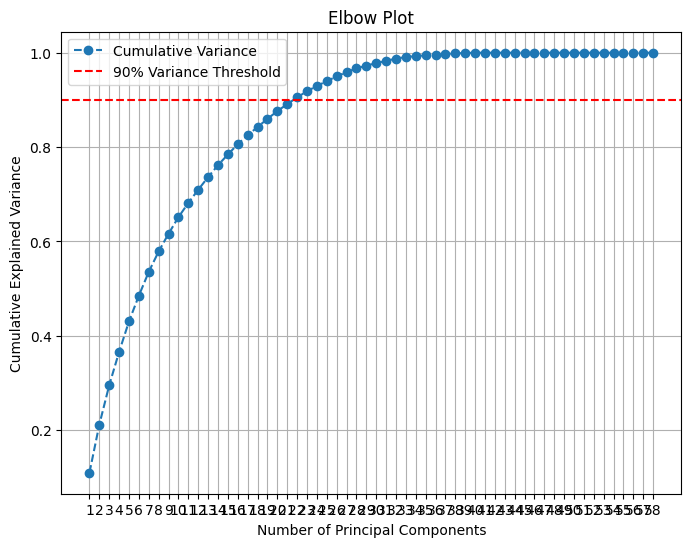


For Subset_2, retain 22 components to explain 90% of the variance.


Explained Variance for Subset_3:
[1.10145531e-01 8.93021221e-02 7.66366571e-02 7.46655835e-02
 6.87260322e-02 5.98746525e-02 5.36368275e-02 4.94190855e-02
 4.06223855e-02 3.67326999e-02 3.09833746e-02 2.92460533e-02
 2.62901304e-02 2.26898571e-02 2.19054243e-02 1.99980519e-02
 1.90978740e-02 1.84469657e-02 1.66834855e-02 1.44511479e-02
 1.35395000e-02 1.30624330e-02 1.22669352e-02 1.17282129e-02
 1.12524399e-02 1.03855396e-02 9.42991079e-03 8.31334999e-03
 7.87156500e-03 5.45235314e-03 4.14208814e-03 3.27820937e-03
 2.07182651e-03 1.84212210e-03 1.54934825e-03 1.12455783e-03
 9.48737437e-04 7.72838021e-04 6.07350236e-04 5.95024292e-04
 2.11716721e-04 1.83377890e-17 1.27099724e-17 9.70225483e-18
 8.80756664e-18 4.37882866e-18 2.10598089e-18 1.48398073e-18
 2.59571227e-34 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulative

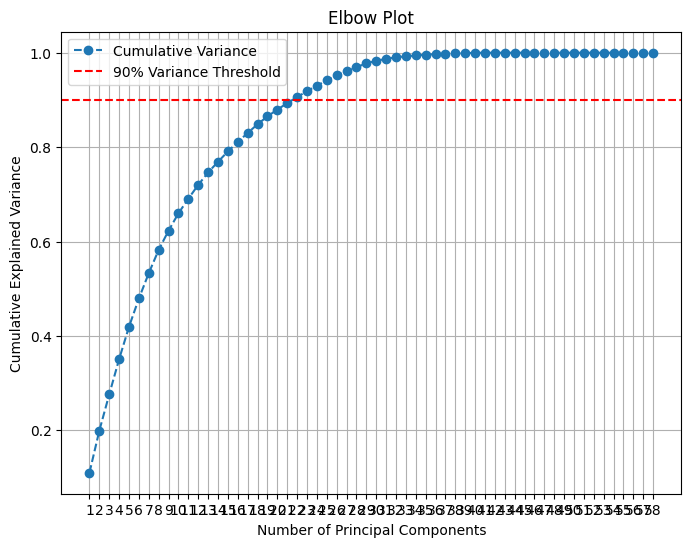


For Subset_3, retain 22 components to explain 90% of the variance.


Explained Variance for Subset_4:
[1.09833011e-01 1.02171695e-01 8.33234759e-02 7.08196693e-02
 6.45300398e-02 5.46465161e-02 5.03754936e-02 4.32022143e-02
 3.75483010e-02 3.50750104e-02 3.01996795e-02 2.78897539e-02
 2.68931292e-02 2.51856415e-02 2.27014996e-02 2.18407159e-02
 1.87580958e-02 1.76342074e-02 1.71301023e-02 1.65581320e-02
 1.46639035e-02 1.43905707e-02 1.29937284e-02 1.11523551e-02
 1.02886929e-02 9.92534533e-03 9.24104346e-03 7.66932479e-03
 6.09961778e-03 5.13572523e-03 4.92864945e-03 4.65834006e-03
 3.40840386e-03 1.83878435e-03 1.67323319e-03 1.60024536e-03
 1.36410639e-03 1.09862902e-03 9.27945305e-04 6.24972377e-04
 1.74451075e-17 7.64664217e-18 6.41986730e-18 3.58670032e-18
 4.85054160e-19 1.34107187e-19 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulative

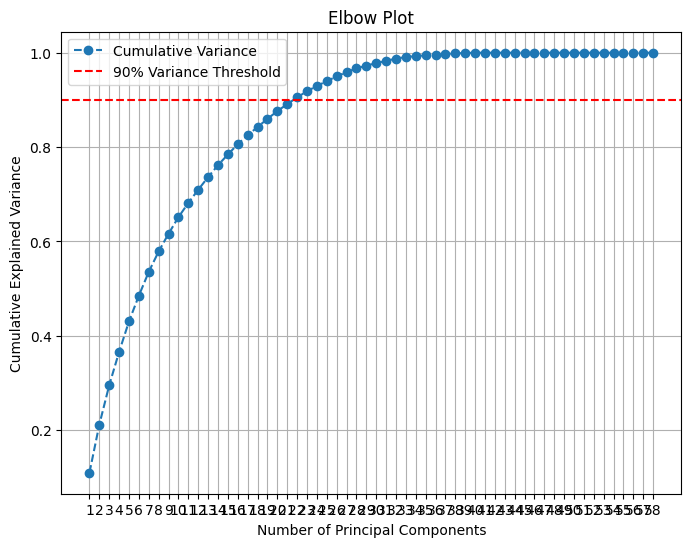


For Subset_4, retain 22 components to explain 90% of the variance.


Explained Variance for Subset_5:
[1.02161754e-01 9.28402712e-02 7.86318974e-02 6.97192064e-02
 6.58300314e-02 6.05434737e-02 5.49250006e-02 5.08661895e-02
 4.34533695e-02 4.17356728e-02 3.16280490e-02 3.01849692e-02
 2.78911853e-02 2.48092273e-02 2.27399120e-02 2.10638089e-02
 1.87453379e-02 1.79520473e-02 1.57319888e-02 1.52102620e-02
 1.45973658e-02 1.33971002e-02 1.21503795e-02 1.01941811e-02
 9.62310725e-03 9.26424085e-03 7.87051351e-03 7.13788646e-03
 6.39822432e-03 5.24692362e-03 3.68210210e-03 3.02760510e-03
 2.43021419e-03 1.75854773e-03 1.35557024e-03 1.30861798e-03
 1.27016730e-03 1.13464373e-03 8.89538749e-04 5.99415698e-04
 1.56095590e-17 1.20969229e-17 1.00940985e-17 2.20570586e-18
 1.76009453e-18 1.19669810e-19 2.62894048e-34 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulative

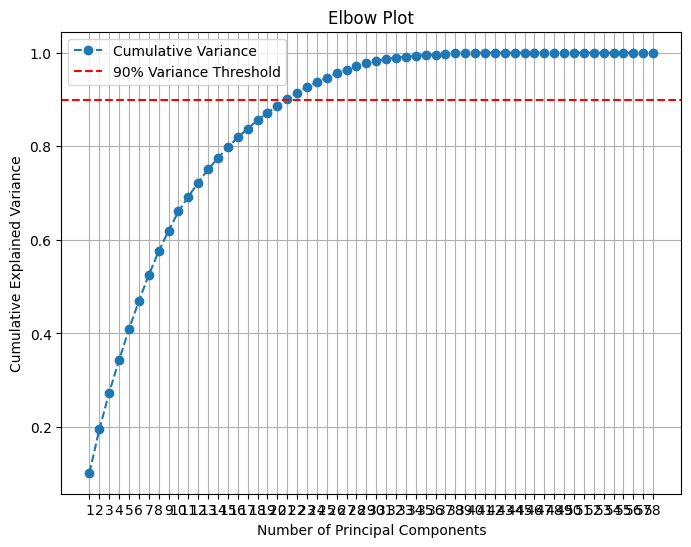


For Subset_5, retain 21 components to explain 90% of the variance.


Explained Variance for Subset_6:
[1.01464979e-01 9.73392452e-02 7.97877209e-02 6.56625771e-02
 6.09730912e-02 5.10184948e-02 4.89712523e-02 4.44543078e-02
 3.97415434e-02 3.63431022e-02 3.05405912e-02 2.96978194e-02
 2.91088126e-02 2.67890883e-02 2.50236805e-02 2.40622676e-02
 2.08334077e-02 2.03003133e-02 1.81708540e-02 1.58715194e-02
 1.48604922e-02 1.39910614e-02 1.34405314e-02 1.24470178e-02
 1.14327871e-02 1.03492290e-02 9.62838792e-03 7.77971698e-03
 7.56233340e-03 7.11645570e-03 6.26809183e-03 5.23420462e-03
 3.58994502e-03 2.27265338e-03 2.21634001e-03 1.80484698e-03
 1.41132621e-03 8.30191470e-04 7.84947909e-04 5.41348058e-04
 2.83424150e-04 1.31833076e-17 1.26166630e-17 8.22126523e-18
 5.04714165e-18 3.58240689e-18 6.29969679e-19 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulative

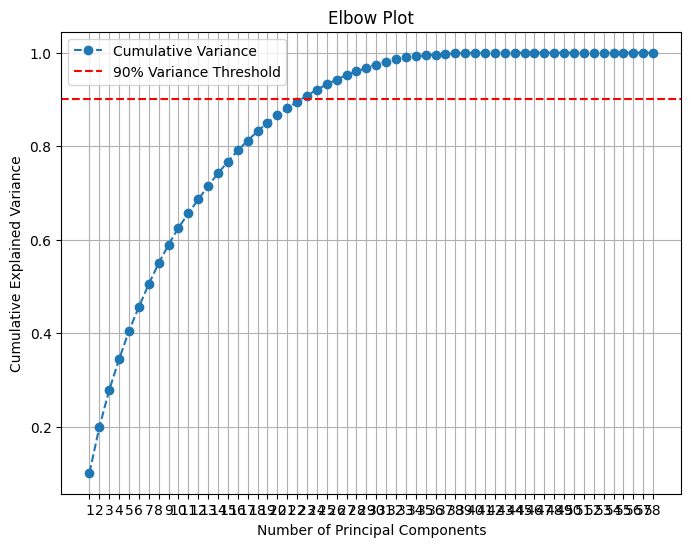


For Subset_6, retain 23 components to explain 90% of the variance.


Explained Variance for Subset_7:
[9.85268278e-02 8.34906208e-02 7.50091122e-02 7.02181274e-02
 6.09063516e-02 5.74152797e-02 4.94457345e-02 4.68878415e-02
 4.01175803e-02 3.85555144e-02 3.55006686e-02 3.21168548e-02
 3.01891969e-02 2.77198147e-02 2.74800127e-02 2.51628461e-02
 2.20278301e-02 2.01263647e-02 1.76161424e-02 1.70638127e-02
 1.51435124e-02 1.41111927e-02 1.33374369e-02 1.16824183e-02
 1.08271555e-02 1.02013709e-02 9.06893981e-03 8.12444392e-03
 7.29081477e-03 5.42209465e-03 4.33923852e-03 3.87055141e-03
 2.47059757e-03 2.19374382e-03 1.76817970e-03 1.33829623e-03
 1.30841909e-03 1.17970620e-03 3.97279843e-04 2.28443516e-04
 1.19630315e-04 1.64658189e-17 1.23928893e-17 5.57843790e-18
 3.53581308e-18 3.10665007e-18 2.32085903e-18 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulative

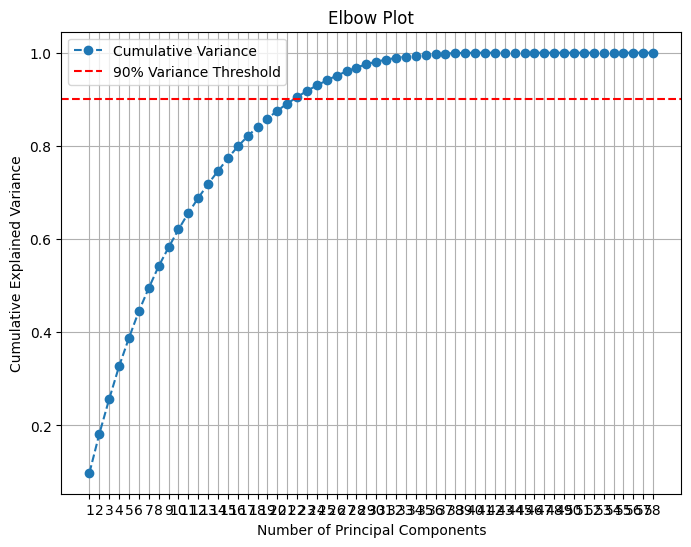


For Subset_7, retain 22 components to explain 90% of the variance.


Explained Variance for Subset_8:
[1.02365435e-01 8.74454048e-02 7.25413311e-02 6.14934619e-02
 5.73887718e-02 5.13251270e-02 4.47186876e-02 4.05637202e-02
 3.85019713e-02 3.48485186e-02 3.15429695e-02 3.05984797e-02
 3.00563175e-02 2.77802666e-02 2.65804974e-02 2.57714906e-02
 2.46655305e-02 2.12570658e-02 2.05637733e-02 1.77201271e-02
 1.71382770e-02 1.60221207e-02 1.52667234e-02 1.43719848e-02
 1.33085606e-02 1.12940950e-02 1.03201373e-02 9.34159115e-03
 8.84596086e-03 8.11796930e-03 7.54261890e-03 6.39631579e-03
 4.94569414e-03 2.06639878e-03 2.01491872e-03 1.64315689e-03
 1.41875323e-03 1.22475292e-03 7.46905421e-04 2.44117999e-04
 1.61055920e-17 1.31056892e-17 1.11510740e-17 7.72578268e-18
 3.79996009e-18 2.18254811e-18 4.72435580e-19 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulative

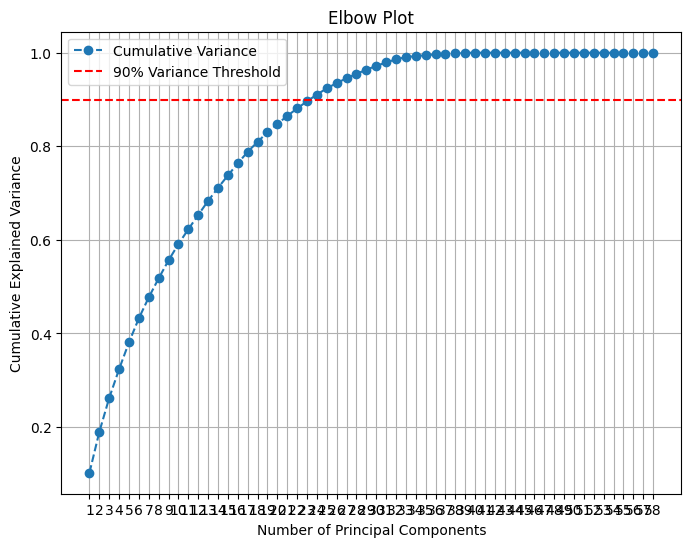


For Subset_8, retain 24 components to explain 90% of the variance.


Explained Variance for Subset_9:
[1.01097360e-01 7.70791694e-02 7.04625768e-02 6.65690011e-02
 6.13661158e-02 5.56753377e-02 4.70830585e-02 4.44046892e-02
 4.25702056e-02 3.93458440e-02 3.70709148e-02 3.31369687e-02
 2.96081007e-02 2.86998177e-02 2.58977369e-02 2.43573976e-02
 2.33156216e-02 1.99408694e-02 1.88373595e-02 1.78808127e-02
 1.62142927e-02 1.47237500e-02 1.42934507e-02 1.08977663e-02
 1.04559659e-02 9.91609315e-03 9.06688416e-03 8.71718600e-03
 8.42335443e-03 7.57488848e-03 6.72110071e-03 4.69389475e-03
 3.74836488e-03 3.37267353e-03 2.42691185e-03 1.68545171e-03
 1.21239448e-03 1.01949459e-03 4.37123482e-04 1.99379388e-32
 5.56490930e-33 3.45376835e-33 2.83269978e-33 1.51361668e-33
 5.75526211e-34 5.24833519e-34 5.24833519e-34 5.24833519e-34
 5.24833519e-34 5.24833519e-34 5.24833519e-34 5.24833519e-34
 5.24833519e-34 5.24833519e-34 5.24833519e-34 5.24833519e-34
 5.24833519e-34 1.15689234e-34]

Cumulative

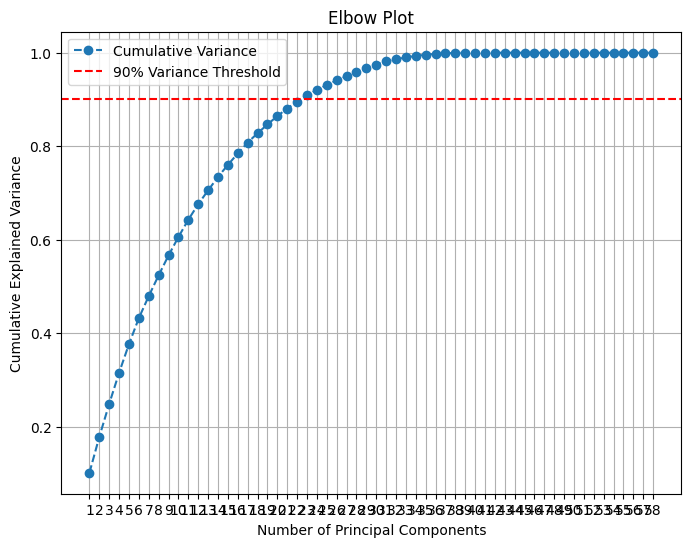


For Subset_9, retain 23 components to explain 90% of the variance.


Explained Variance for Subset_10:
[9.57247987e-02 8.23148637e-02 7.25790298e-02 6.37764655e-02
 5.52069573e-02 4.88885785e-02 4.29771520e-02 4.01273611e-02
 3.75959019e-02 3.42655179e-02 3.23059324e-02 3.09682529e-02
 3.07474517e-02 2.82709251e-02 2.72859888e-02 2.70442903e-02
 2.40377288e-02 2.30731478e-02 2.13498853e-02 2.02916374e-02
 1.84223207e-02 1.70501789e-02 1.50697998e-02 1.45239881e-02
 1.26879563e-02 1.19753869e-02 1.08974885e-02 1.00486038e-02
 8.65330126e-03 8.04632704e-03 6.98403774e-03 6.33674803e-03
 5.12529245e-03 3.98274938e-03 3.75811156e-03 2.42207552e-03
 1.88438900e-03 1.73242294e-03 9.20373958e-04 6.46581003e-04
 1.88783878e-32 8.64589442e-33 4.90274167e-33 3.34839994e-33
 2.77111811e-33 1.09850094e-33 4.82197270e-34 4.82197270e-34
 4.82197270e-34 4.82197270e-34 4.82197270e-34 4.82197270e-34
 4.82197270e-34 4.82197270e-34 4.82197270e-34 4.82197270e-34
 1.58473555e-34 1.22053727e-34]

Cumulativ

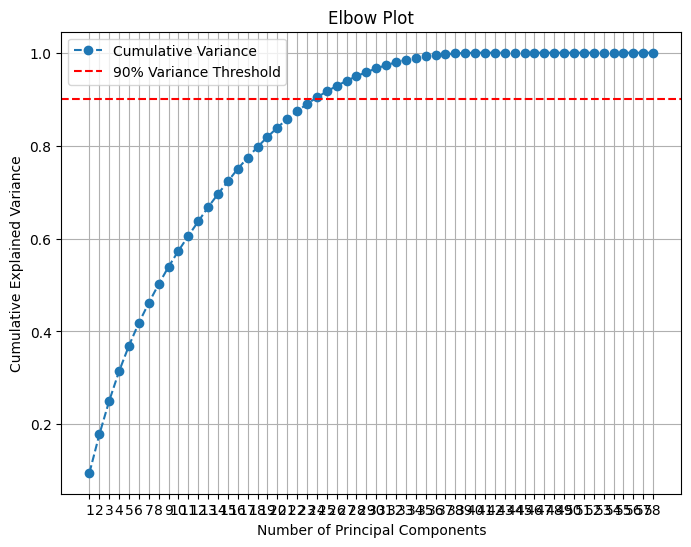


For Subset_10, retain 24 components to explain 90% of the variance.


Explained Variance for Subset_11:
[9.72408117e-02 9.45005760e-02 7.24545963e-02 6.83942625e-02
 6.47238672e-02 5.07806023e-02 4.81524585e-02 4.62136426e-02
 4.01680632e-02 3.69586236e-02 3.53732605e-02 3.32318517e-02
 2.79133315e-02 2.64963939e-02 2.52767159e-02 2.45494622e-02
 2.28573645e-02 2.05667317e-02 1.94434226e-02 1.75345193e-02
 1.54714589e-02 1.37743544e-02 1.30523458e-02 1.20927648e-02
 1.12163293e-02 1.03155599e-02 8.69368336e-03 7.53620632e-03
 6.94276389e-03 5.14928945e-03 4.76022152e-03 4.35600855e-03
 3.92951853e-03 2.71476545e-03 2.17208819e-03 2.10404312e-03
 1.22601615e-03 9.80528526e-04 6.81496173e-04 1.91773687e-32
 3.01212297e-33 2.79104101e-33 1.96252482e-33 1.32673942e-33
 6.30762628e-34 6.30762628e-34 6.30762628e-34 6.30762628e-34
 6.30762628e-34 6.30762628e-34 6.30762628e-34 6.30762628e-34
 6.30762628e-34 6.30762628e-34 6.30762628e-34 6.30762628e-34
 3.15671477e-34 1.56175320e-34]

Cumulati

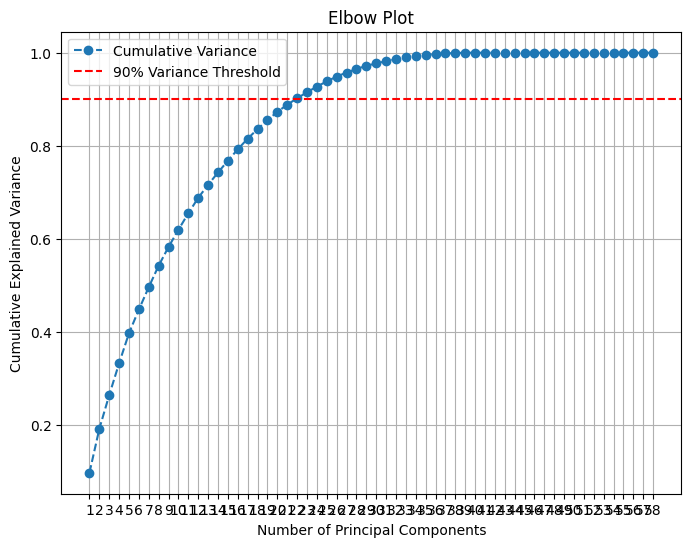


For Subset_11, retain 22 components to explain 90% of the variance.


Explained Variance for Subset_12:
[9.38839443e-02 7.41731297e-02 7.04645156e-02 6.55029169e-02
 5.44310930e-02 5.03626230e-02 4.22419846e-02 4.08363516e-02
 3.71636157e-02 3.45337330e-02 3.37419815e-02 2.99171750e-02
 2.88344830e-02 2.61573004e-02 2.59465521e-02 2.50935676e-02
 2.40934932e-02 2.23892223e-02 2.14773161e-02 1.90835553e-02
 1.82497969e-02 1.77861254e-02 1.63234037e-02 1.53231096e-02
 1.49520798e-02 1.26685381e-02 1.18646688e-02 1.06010958e-02
 9.22383866e-03 8.94746721e-03 8.38262557e-03 8.15111737e-03
 6.73431534e-03 4.90070602e-03 4.24313020e-03 3.24037678e-03
 2.84028491e-03 2.33755682e-03 1.59730728e-03 1.30390177e-03
 1.85153433e-32 5.42362428e-33 5.11546017e-33 2.76190259e-33
 2.49117417e-33 8.80296238e-34 6.66470160e-34 6.66470160e-34
 6.66470160e-34 6.66470160e-34 6.66470160e-34 6.66470160e-34
 6.66470160e-34 6.66470160e-34 6.66470160e-34 6.66470160e-34
 2.04149733e-34 6.93107356e-35]

Cumulati

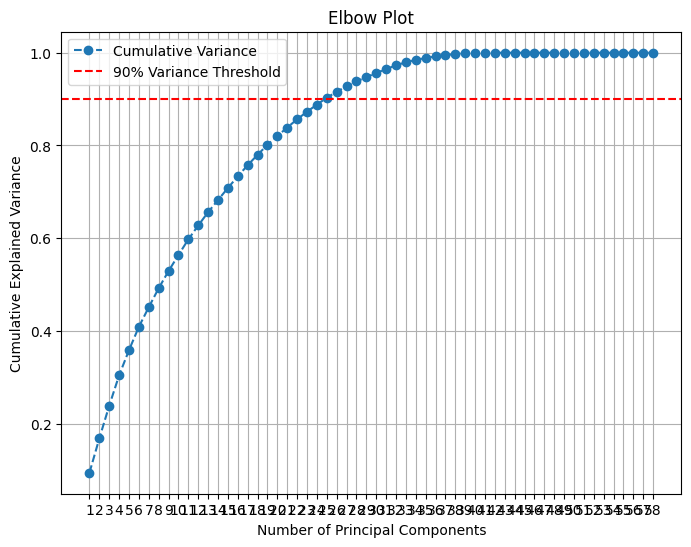


For Subset_12, retain 25 components to explain 90% of the variance.

Subset Subset_13 is empty, skipping PCA.

Explained Variance for Subset_14:
[1.38427482e-01 1.07026408e-01 8.60830012e-02 7.23347753e-02
 6.11867501e-02 5.55338651e-02 4.70657340e-02 4.51065928e-02
 3.44133403e-02 3.17227366e-02 2.80932000e-02 2.71155473e-02
 2.49931864e-02 2.14355181e-02 2.09097350e-02 1.81942566e-02
 1.57887022e-02 1.52510605e-02 1.51600774e-02 1.45177415e-02
 1.23565652e-02 1.18729237e-02 1.06331969e-02 1.02494677e-02
 9.28585557e-03 8.84701481e-03 8.40552125e-03 6.91155179e-03
 6.19838794e-03 5.75343916e-03 5.27328408e-03 5.07341798e-03
 4.18941993e-03 3.00942671e-03 2.66272345e-03 2.36078345e-03
 2.12580847e-03 1.87950336e-03 1.53085030e-03 9.43467075e-04
 7.76809175e-05 2.16092122e-17 1.19995017e-17 8.70319092e-18
 2.30224830e-18 2.20280559e-18 8.88464474e-19 1.77569990e-34
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00


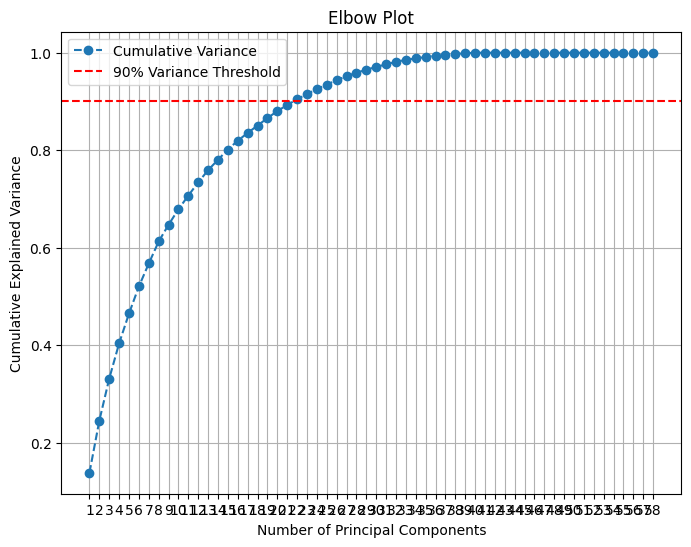


For Subset_14, retain 22 components to explain 90% of the variance.


Explained Variance for Subset_15:
[1.39688774e-01 9.36454793e-02 7.84995501e-02 5.99707209e-02
 5.88579987e-02 5.29984673e-02 5.04982383e-02 4.42806131e-02
 4.01067404e-02 3.94687598e-02 3.14944698e-02 2.94724993e-02
 2.79781950e-02 2.55117460e-02 2.29662084e-02 2.15045126e-02
 1.78138652e-02 1.50779406e-02 1.45056364e-02 1.36495146e-02
 1.30913408e-02 1.14475696e-02 1.11285664e-02 1.02503934e-02
 9.43195295e-03 8.92135529e-03 8.20158709e-03 7.00258233e-03
 6.41833785e-03 6.20590829e-03 5.83897730e-03 4.47885794e-03
 4.12544691e-03 3.54342325e-03 3.28378157e-03 2.89013845e-03
 1.84755058e-03 1.43574363e-03 1.29557204e-03 9.26948876e-04
 2.44035955e-04 1.37671255e-17 1.09431867e-17 5.28442555e-18
 2.51298021e-18 1.54325063e-18 3.30387970e-20 1.16958617e-33
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

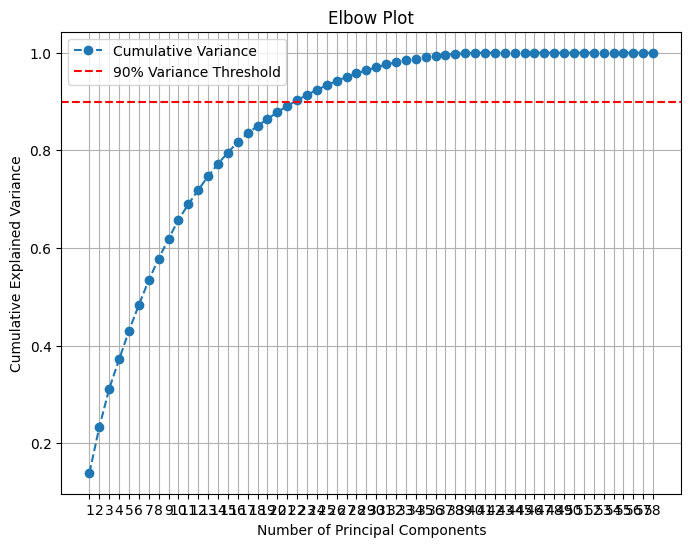


For Subset_15, retain 22 components to explain 90% of the variance.


Explained Variance for Subset_16:
[1.38427482e-01 1.07026408e-01 8.60830012e-02 7.23347753e-02
 6.11867501e-02 5.55338651e-02 4.70657340e-02 4.51065928e-02
 3.44133403e-02 3.17227366e-02 2.80932000e-02 2.71155473e-02
 2.49931864e-02 2.14355181e-02 2.09097350e-02 1.81942566e-02
 1.57887022e-02 1.52510605e-02 1.51600774e-02 1.45177415e-02
 1.23565652e-02 1.18729237e-02 1.06331969e-02 1.02494677e-02
 9.28585557e-03 8.84701481e-03 8.40552125e-03 6.91155179e-03
 6.19838794e-03 5.75343916e-03 5.27328408e-03 5.07341798e-03
 4.18941993e-03 3.00942671e-03 2.66272345e-03 2.36078345e-03
 2.12580847e-03 1.87950336e-03 1.53085030e-03 9.43467075e-04
 7.76809175e-05 2.16092122e-17 1.19995017e-17 8.70319092e-18
 2.30224830e-18 2.20280559e-18 8.88464474e-19 1.77569990e-34
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

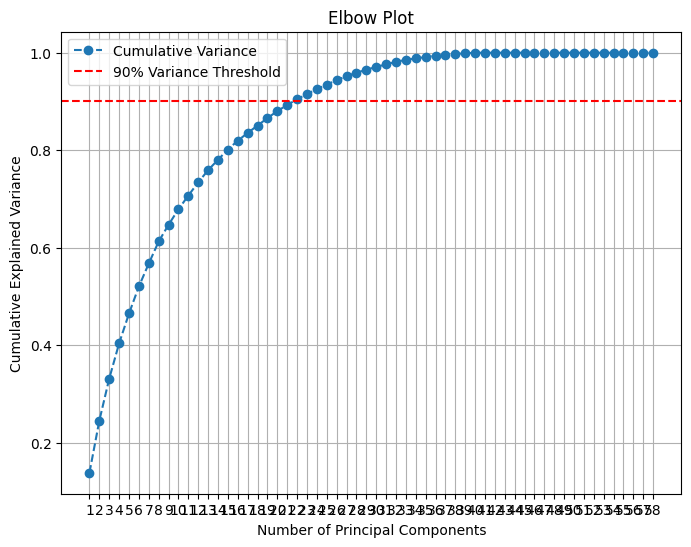


For Subset_16, retain 22 components to explain 90% of the variance.


Explained Variance for Subset_17:
[1.25228414e-01 8.90864934e-02 7.77326629e-02 6.34336257e-02
 5.83307013e-02 5.63254406e-02 5.34207900e-02 5.18314180e-02
 4.68820536e-02 4.37649032e-02 3.34697557e-02 3.18714797e-02
 3.06386035e-02 2.84133260e-02 2.40359096e-02 1.90028197e-02
 1.54164801e-02 1.40809895e-02 1.37393907e-02 1.28827087e-02
 1.20595090e-02 1.12856011e-02 1.10198311e-02 9.07282073e-03
 8.30545487e-03 7.80144424e-03 6.66515091e-03 6.43325644e-03
 5.82642011e-03 4.98663231e-03 4.23071523e-03 4.10169726e-03
 3.91928149e-03 3.13113145e-03 2.98345321e-03 2.76067511e-03
 1.84030722e-03 1.60253864e-03 1.18041310e-03 1.00783461e-03
 1.97865996e-04 3.09955906e-17 1.64686119e-17 9.07911151e-18
 6.19053178e-18 3.01602997e-18 5.28870055e-34 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

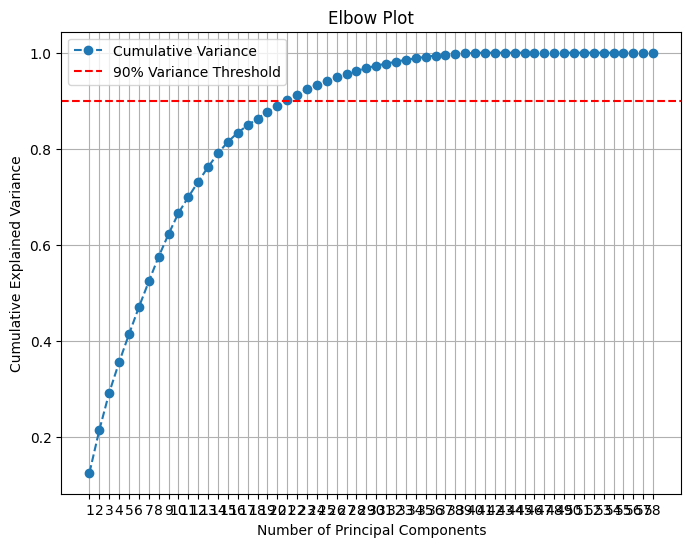


For Subset_17, retain 21 components to explain 90% of the variance.


Explained Variance for Subset_18:
[1.23386767e-01 9.45077920e-02 7.32490385e-02 6.08653882e-02
 5.69974882e-02 5.36954683e-02 4.65473724e-02 4.62988226e-02
 4.18398103e-02 3.96106184e-02 3.33697644e-02 2.91513449e-02
 2.72963180e-02 2.49579532e-02 2.29481885e-02 2.24113196e-02
 1.93185638e-02 1.76765076e-02 1.44724799e-02 1.34406720e-02
 1.29288950e-02 1.22259747e-02 1.16614230e-02 1.10712084e-02
 1.06100412e-02 1.03654957e-02 9.11629791e-03 8.95372649e-03
 7.26565514e-03 6.75447842e-03 6.74100378e-03 6.22018734e-03
 4.33226287e-03 4.17473196e-03 3.53078504e-03 3.19806656e-03
 2.88464823e-03 2.32619555e-03 1.84232296e-03 1.60193600e-03
 1.52985791e-04 1.74262066e-17 1.26098581e-17 6.19628258e-18
 5.97020186e-18 1.91863400e-18 1.44669854e-18 3.05214352e-19
 2.67503342e-31 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

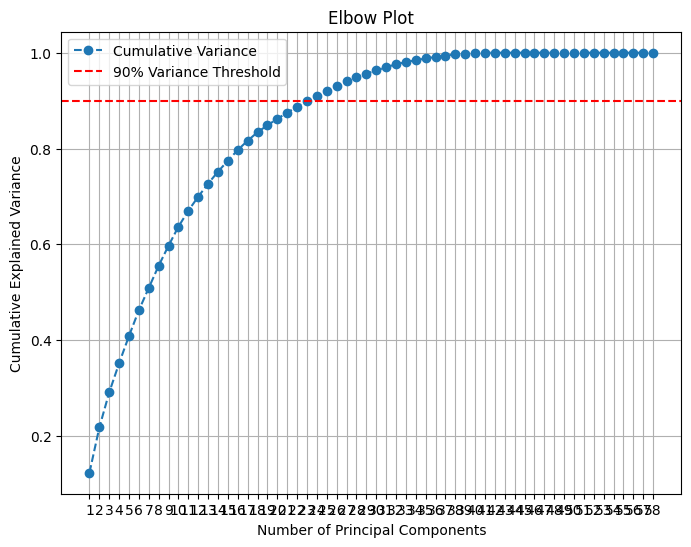


For Subset_18, retain 24 components to explain 90% of the variance.


Explained Variance for Subset_19:
[1.18810322e-01 8.60618235e-02 7.38520996e-02 5.95698756e-02
 5.74371841e-02 5.56306867e-02 5.34735295e-02 4.92139566e-02
 4.48630376e-02 4.03281798e-02 3.79642597e-02 3.39523273e-02
 3.10762144e-02 3.01363099e-02 2.47810066e-02 2.07007474e-02
 1.67106244e-02 1.59710818e-02 1.41316235e-02 1.30294423e-02
 1.25704016e-02 1.10371865e-02 1.02324827e-02 9.84076114e-03
 8.86743299e-03 8.43526904e-03 7.94138989e-03 6.93516805e-03
 6.42537264e-03 5.95462064e-03 5.69253720e-03 5.27469252e-03
 4.78370741e-03 3.97841825e-03 3.84905798e-03 3.51589674e-03
 2.25470449e-03 1.83803118e-03 1.56691416e-03 1.19752321e-03
 1.14099356e-04 1.72987391e-17 7.12428969e-18 2.01954099e-18
 5.65551025e-20 1.98959081e-33 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

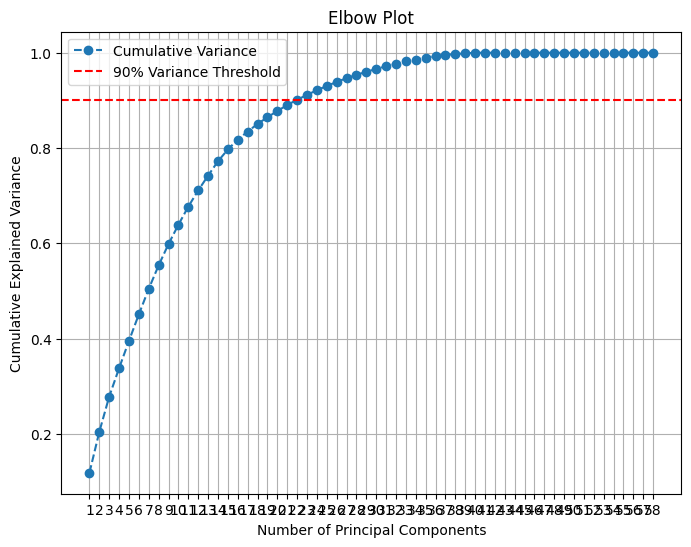


For Subset_19, retain 22 components to explain 90% of the variance.


Explained Variance for Subset_20:
[1.14669444e-01 8.62273941e-02 7.06267590e-02 5.78899534e-02
 5.62859547e-02 5.00025811e-02 4.73934982e-02 4.21180496e-02
 4.09343542e-02 3.70421552e-02 3.27790297e-02 3.21422607e-02
 2.97357394e-02 2.75145897e-02 2.42599913e-02 2.41643854e-02
 1.98089432e-02 1.91975968e-02 1.82135867e-02 1.55628920e-02
 1.43309516e-02 1.36364692e-02 1.30606612e-02 1.19669687e-02
 1.02123475e-02 9.85364479e-03 9.24805746e-03 8.91242754e-03
 8.67241799e-03 8.39035146e-03 8.05437660e-03 7.88315000e-03
 5.29156563e-03 5.25907677e-03 4.30153964e-03 3.91331967e-03
 3.52160650e-03 2.85292814e-03 2.12570745e-03 1.82825598e-03
 1.15017394e-04 1.98854264e-17 9.06648546e-18 5.30676085e-18
 2.67113115e-18 2.32697931e-18 3.54412303e-28 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

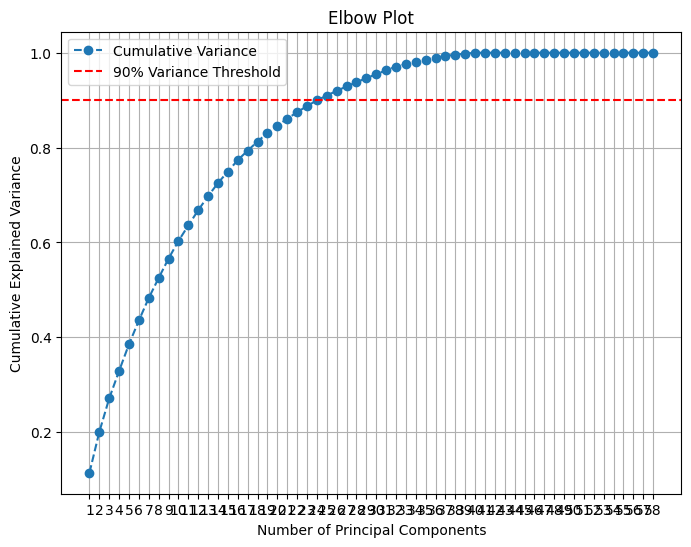


For Subset_20, retain 25 components to explain 90% of the variance.


Explained Variance for Subset_21:
[1.05693132e-01 8.63232541e-02 7.24807759e-02 6.16446385e-02
 5.65330664e-02 5.61236616e-02 4.95943789e-02 4.61889446e-02
 4.56443004e-02 3.99204287e-02 3.59979111e-02 3.39711149e-02
 2.98819950e-02 2.76558798e-02 2.66207392e-02 2.14160940e-02
 1.83083150e-02 1.76782433e-02 1.54749136e-02 1.41575433e-02
 1.28577822e-02 1.16112797e-02 1.13994334e-02 1.04952519e-02
 1.01192436e-02 9.69684560e-03 8.87952849e-03 8.36834866e-03
 8.04709474e-03 7.62548745e-03 6.83206653e-03 6.12063380e-03
 5.27363938e-03 4.72940593e-03 4.38555088e-03 3.49124655e-03
 2.76156022e-03 2.41902732e-03 2.28852639e-03 1.18795066e-03
 1.00766188e-04 1.11860599e-17 5.76614691e-18 5.36142229e-18
 3.18424019e-18 7.22742537e-19 9.68463487e-22 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

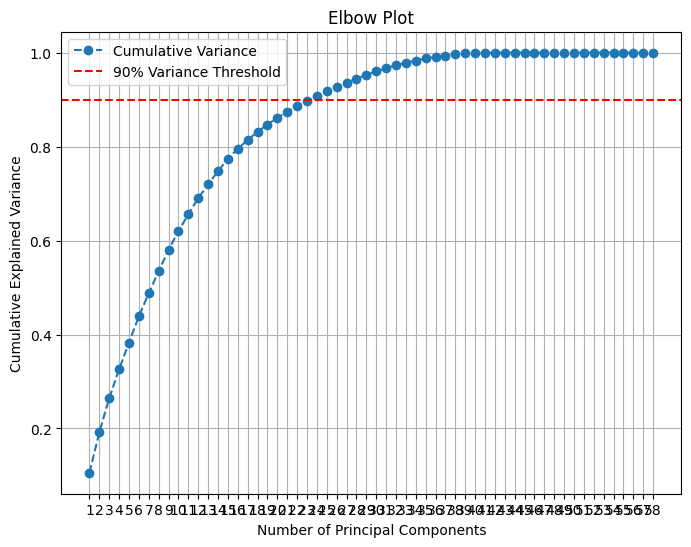


For Subset_21, retain 24 components to explain 90% of the variance.


Explained Variance for Subset_22:
[1.05527892e-01 7.84899012e-02 6.45401867e-02 5.96501624e-02
 5.32321469e-02 4.91681626e-02 4.70526944e-02 4.17781989e-02
 4.07089502e-02 3.66198588e-02 3.35046919e-02 3.27093117e-02
 3.00394342e-02 2.67234788e-02 2.60382788e-02 2.44577281e-02
 2.14547157e-02 2.02387058e-02 1.76311192e-02 1.72559724e-02
 1.61777909e-02 1.57010408e-02 1.52400790e-02 1.31226809e-02
 1.20808610e-02 1.17714231e-02 1.09247237e-02 1.05140430e-02
 9.30816507e-03 8.54751895e-03 7.07891444e-03 6.72633365e-03
 6.53571830e-03 6.36162059e-03 5.74533853e-03 5.02569049e-03
 3.86726971e-03 3.33869183e-03 2.84330656e-03 2.05155247e-03
 2.15646498e-04 1.64114926e-17 9.49298540e-18 7.47687450e-18
 5.34326151e-18 2.37721049e-18 1.77830399e-18 1.38317654e-18
 4.63674570e-30 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

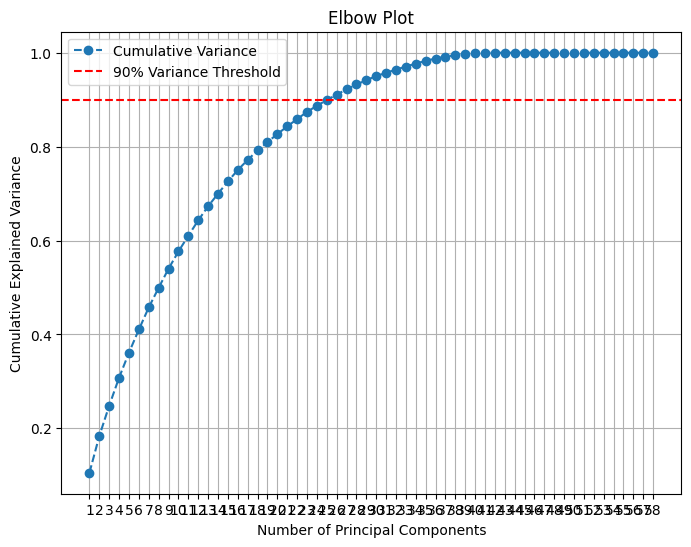


For Subset_22, retain 26 components to explain 90% of the variance.


Explained Variance for Subset_23:
[1.16632198e-01 6.98564661e-02 6.43416571e-02 6.05385228e-02
 5.31882393e-02 5.21333217e-02 4.87758847e-02 4.46088765e-02
 4.05663491e-02 3.76094673e-02 3.61631049e-02 3.40271867e-02
 3.29079275e-02 3.00270693e-02 2.91001958e-02 2.37769557e-02
 1.89794919e-02 1.75705367e-02 1.58240561e-02 1.51073278e-02
 1.39394499e-02 1.34731835e-02 1.25171407e-02 1.23677561e-02
 1.10817176e-02 1.02681840e-02 1.01182900e-02 9.71879454e-03
 9.11151339e-03 8.83829524e-03 8.10939801e-03 8.07844239e-03
 7.55624624e-03 6.95922320e-03 4.31837439e-03 3.06156475e-03
 2.80275977e-03 2.42337704e-03 2.19803909e-03 1.32341533e-03
 1.56700599e-17 1.19810397e-17 1.10382150e-17 6.23858595e-18
 2.12767108e-18 3.75111919e-19 2.33312974e-28 2.23713219e-36
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

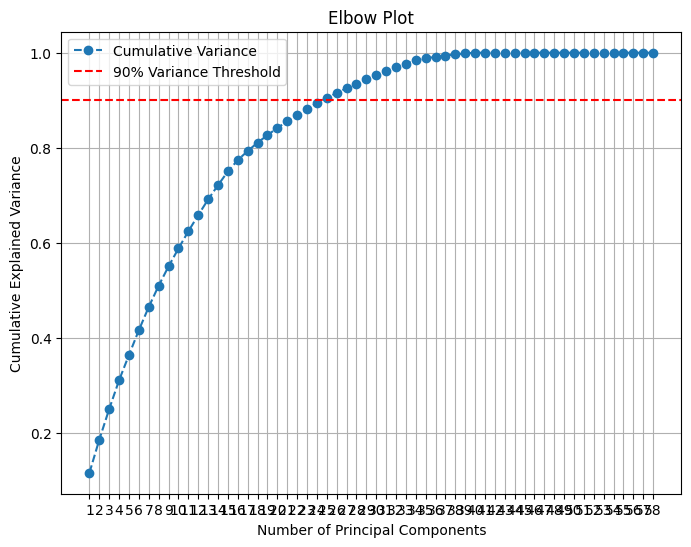


For Subset_23, retain 25 components to explain 90% of the variance.


Explained Variance for Subset_24:
[1.13275662e-01 6.68032354e-02 6.15407415e-02 5.84027323e-02
 4.84498603e-02 4.74935465e-02 4.67993331e-02 4.14836014e-02
 3.85411991e-02 3.57040205e-02 3.28976080e-02 3.09297030e-02
 3.04756043e-02 2.81492770e-02 2.58532179e-02 2.38858241e-02
 2.24999773e-02 2.08325793e-02 1.93351539e-02 1.85478076e-02
 1.69244742e-02 1.64351303e-02 1.58276296e-02 1.48157365e-02
 1.46554680e-02 1.28383772e-02 1.22318104e-02 1.13208992e-02
 1.10529681e-02 9.74398497e-03 8.27229555e-03 7.73178371e-03
 6.66445289e-03 5.96883304e-03 5.74600632e-03 5.06739694e-03
 3.65711821e-03 3.43448011e-03 2.73831086e-03 2.67153071e-03
 3.00628302e-04 1.55731208e-17 7.16043543e-18 4.07198351e-18
 1.42057101e-18 5.45601293e-19 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

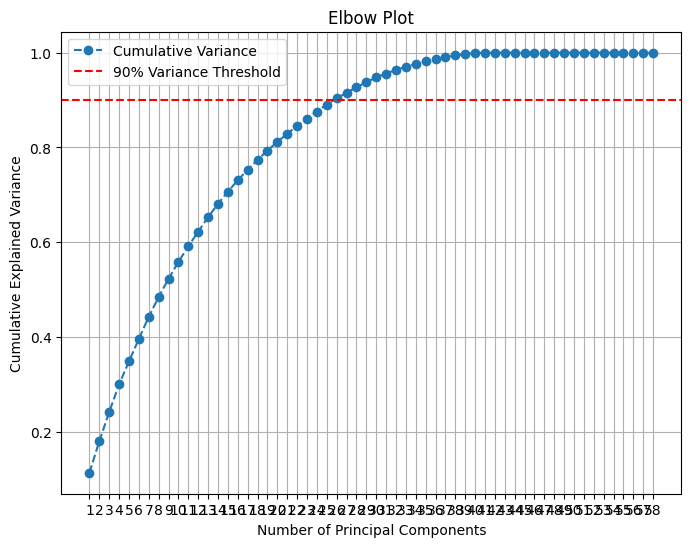


For Subset_24, retain 26 components to explain 90% of the variance.

Subset Subset_25 is empty, skipping PCA.

Explained Variance for Subset_26:
[1.39873177e-01 8.45067608e-02 7.53706924e-02 5.92680326e-02
 5.65878169e-02 5.45542829e-02 4.80345492e-02 4.47539807e-02
 4.19850631e-02 4.00690294e-02 3.74892230e-02 3.16460966e-02
 2.90945703e-02 2.29819195e-02 1.97068964e-02 1.87213964e-02
 1.75123319e-02 1.63160101e-02 1.53729752e-02 1.42995042e-02
 1.19749550e-02 1.13537907e-02 1.10148927e-02 1.02061389e-02
 9.41239520e-03 9.00387408e-03 8.51542727e-03 7.76452558e-03
 7.30057806e-03 6.81970627e-03 6.53248099e-03 6.11271532e-03
 5.20068906e-03 4.71767126e-03 4.12609734e-03 3.61400402e-03
 2.86471442e-03 1.91798780e-03 1.80850757e-03 1.45304097e-03
 1.41498105e-04 1.64506856e-17 1.23666405e-17 5.45877991e-18
 2.58028493e-18 3.35712346e-19 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00


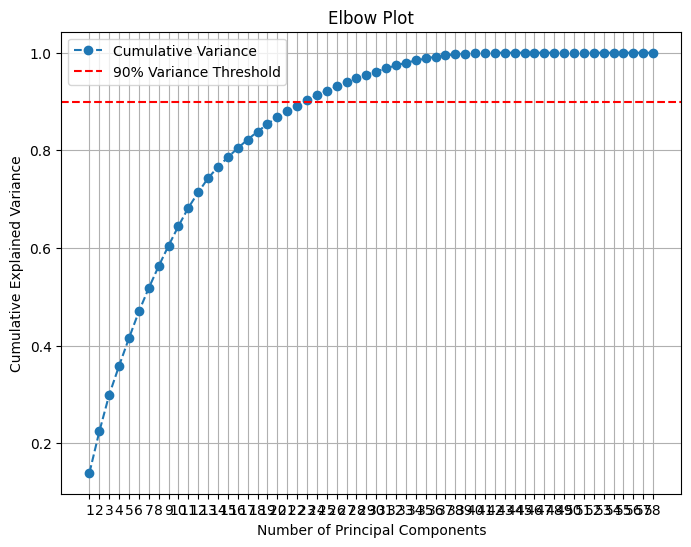


For Subset_26, retain 23 components to explain 90% of the variance.


Explained Variance for Subset_27:
[1.51046452e-01 7.54738225e-02 6.43457888e-02 5.45318376e-02
 5.35462186e-02 4.68374442e-02 4.59588018e-02 4.38655237e-02
 4.20432860e-02 3.85515037e-02 3.50438297e-02 3.22327142e-02
 2.79007704e-02 2.74268675e-02 2.66219729e-02 2.01890741e-02
 1.98403589e-02 1.68094667e-02 1.44739452e-02 1.32335188e-02
 1.29221113e-02 1.26910676e-02 1.21006632e-02 1.20296162e-02
 1.09663472e-02 1.04389292e-02 1.00082743e-02 9.30934562e-03
 9.17709479e-03 7.69209040e-03 7.48004562e-03 6.39957109e-03
 6.08020261e-03 5.82375376e-03 5.49206738e-03 2.98478558e-03
 2.70907051e-03 2.61003775e-03 1.61533368e-03 1.29446933e-03
 2.01925762e-04 1.28544292e-17 1.13097376e-17 8.28404245e-18
 3.16766993e-18 1.27411098e-18 1.02201323e-18 3.71346802e-28
 3.17453428e-34 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

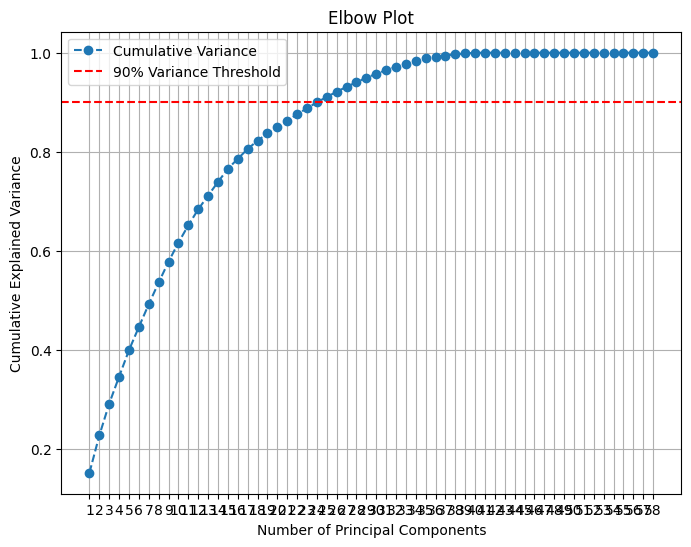


For Subset_27, retain 25 components to explain 90% of the variance.


Explained Variance for Subset_28:
[1.39873177e-01 8.45067608e-02 7.53706924e-02 5.92680326e-02
 5.65878169e-02 5.45542829e-02 4.80345492e-02 4.47539807e-02
 4.19850631e-02 4.00690294e-02 3.74892230e-02 3.16460966e-02
 2.90945703e-02 2.29819195e-02 1.97068964e-02 1.87213964e-02
 1.75123319e-02 1.63160101e-02 1.53729752e-02 1.42995042e-02
 1.19749550e-02 1.13537907e-02 1.10148927e-02 1.02061389e-02
 9.41239520e-03 9.00387408e-03 8.51542727e-03 7.76452558e-03
 7.30057806e-03 6.81970627e-03 6.53248099e-03 6.11271532e-03
 5.20068906e-03 4.71767126e-03 4.12609734e-03 3.61400402e-03
 2.86471442e-03 1.91798780e-03 1.80850757e-03 1.45304097e-03
 1.41498105e-04 1.64506856e-17 1.23666405e-17 5.45877991e-18
 2.58028493e-18 3.35712346e-19 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

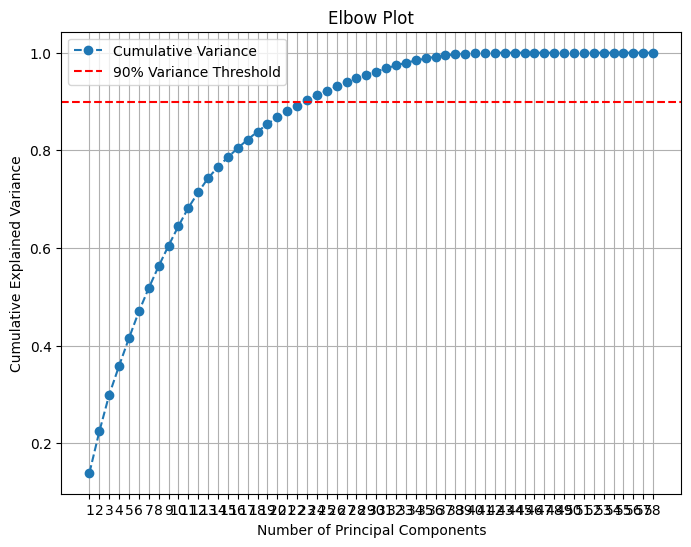


For Subset_28, retain 23 components to explain 90% of the variance.


Explained Variance for Subset_29:
[1.32950762e-01 7.87412081e-02 6.81567070e-02 6.03729330e-02
 5.78799993e-02 5.17011365e-02 4.87829859e-02 4.61712064e-02
 4.46117214e-02 4.27892945e-02 4.09833036e-02 3.43866193e-02
 2.89765207e-02 2.84325084e-02 2.69434958e-02 1.82786460e-02
 1.72354614e-02 1.46076563e-02 1.41011994e-02 1.25685316e-02
 1.17050620e-02 1.12523377e-02 1.08460564e-02 1.01529428e-02
 9.91276593e-03 9.11381632e-03 8.32934433e-03 7.97681660e-03
 6.72299886e-03 6.54984801e-03 6.42495486e-03 5.74891415e-03
 5.70377928e-03 5.19977512e-03 4.57966673e-03 3.25949445e-03
 2.75829888e-03 2.37125138e-03 1.51288284e-03 1.03978943e-03
 1.67307452e-04 1.34058140e-17 6.97623332e-18 5.82995216e-18
 5.12729792e-18 3.05180417e-18 1.26955247e-18 6.01982743e-20
 6.63385111e-28 3.27101489e-34 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

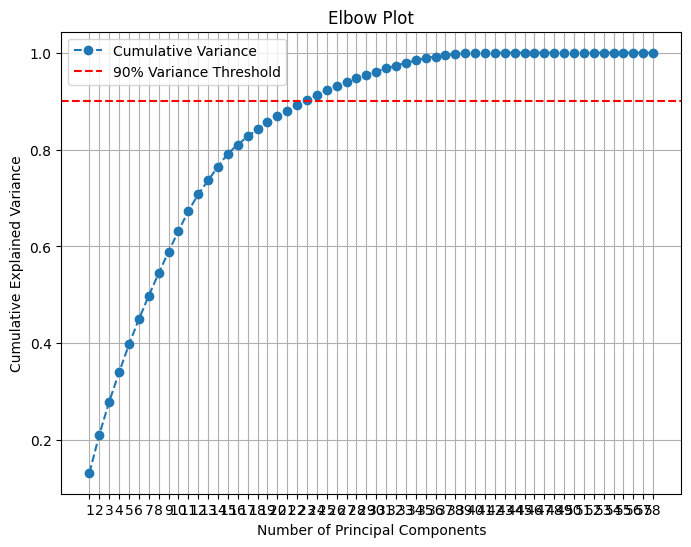


For Subset_29, retain 23 components to explain 90% of the variance.


Explained Variance for Subset_30:
[1.25565780e-01 7.83239420e-02 6.48174018e-02 5.83544811e-02
 5.36902715e-02 5.10086842e-02 5.08577415e-02 4.52294319e-02
 4.40859565e-02 4.32635840e-02 3.97264558e-02 3.40199633e-02
 2.95272455e-02 2.69208732e-02 2.17653479e-02 1.98187842e-02
 1.84159912e-02 1.68919842e-02 1.62898971e-02 1.33494541e-02
 1.25821180e-02 1.22911076e-02 1.15978599e-02 1.11466039e-02
 1.00359986e-02 9.95259167e-03 9.27588539e-03 8.53193403e-03
 8.29944079e-03 8.12610727e-03 7.10406769e-03 6.83826180e-03
 6.30193719e-03 5.87667545e-03 5.54673052e-03 4.05072193e-03
 3.48507670e-03 2.65984050e-03 2.31369572e-03 1.88898900e-03
 1.71084878e-04 1.07377424e-17 7.16692970e-18 3.91887945e-18
 2.22243905e-18 7.94563594e-19 8.66502134e-33 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

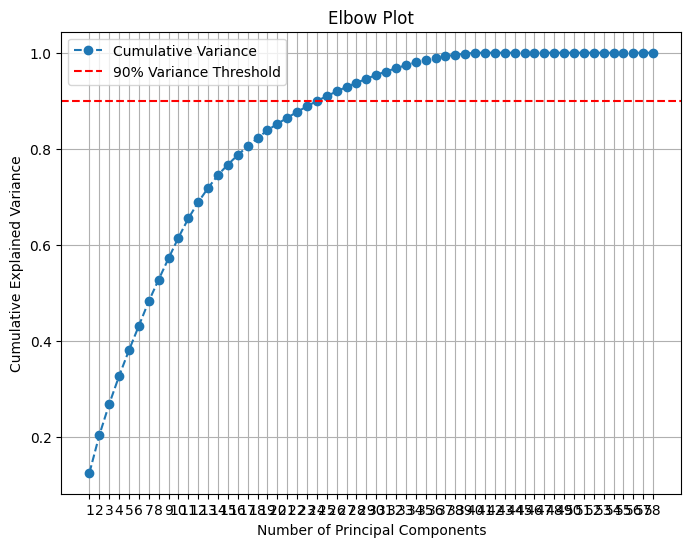


For Subset_30, retain 25 components to explain 90% of the variance.


Explained Variance for Subset_31:
[1.24825806e-01 7.71324563e-02 6.69900948e-02 5.94480458e-02
 5.51294621e-02 5.35562132e-02 4.77974218e-02 4.44869035e-02
 4.33379439e-02 4.17347816e-02 3.87497744e-02 3.46798105e-02
 3.04116739e-02 2.90501786e-02 2.78429757e-02 2.14108322e-02
 1.88031934e-02 1.79338878e-02 1.48581296e-02 1.42924745e-02
 1.23141211e-02 1.17432025e-02 1.14627322e-02 1.04411989e-02
 1.00299429e-02 9.26357975e-03 8.52203726e-03 7.77825472e-03
 6.80737047e-03 6.73804000e-03 6.59036898e-03 6.36109234e-03
 6.28718366e-03 6.14804166e-03 4.84086566e-03 3.24547953e-03
 3.17771445e-03 2.52922384e-03 2.05325571e-03 1.03125689e-03
 1.62977800e-04 1.50965700e-17 1.44116087e-17 9.18827437e-18
 8.64904168e-18 7.75617346e-18 4.68843331e-18 3.40888140e-18
 2.07511817e-29 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

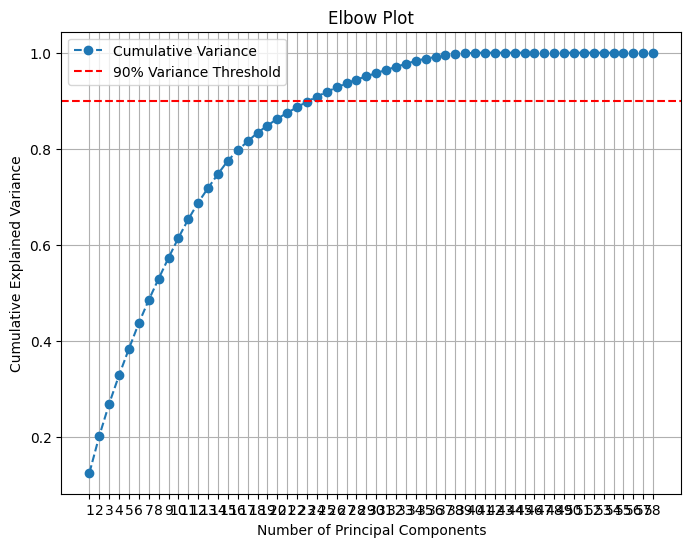


For Subset_31, retain 24 components to explain 90% of the variance.


Explained Variance for Subset_32:
[1.25060757e-01 7.20683639e-02 6.30087559e-02 5.85057997e-02
 5.27270893e-02 5.04375744e-02 4.77532530e-02 4.43446888e-02
 4.26764724e-02 4.02025096e-02 3.65529197e-02 3.22708028e-02
 2.93007520e-02 2.65273393e-02 2.35355858e-02 2.21381787e-02
 1.98858654e-02 1.82951037e-02 1.78440089e-02 1.52060346e-02
 1.45127563e-02 1.34708910e-02 1.28339416e-02 1.17270384e-02
 1.10160263e-02 1.08856570e-02 9.95497597e-03 9.06159273e-03
 8.86785345e-03 8.08143356e-03 7.94341512e-03 7.63452978e-03
 7.04672188e-03 6.54899088e-03 5.02024265e-03 4.94615391e-03
 4.21229760e-03 3.16527655e-03 2.85762242e-03 1.66812848e-03
 2.02600012e-04 1.65574214e-17 8.99226249e-18 5.21430862e-18
 4.46402394e-18 4.08620051e-18 4.01834437e-18 3.45603102e-20
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

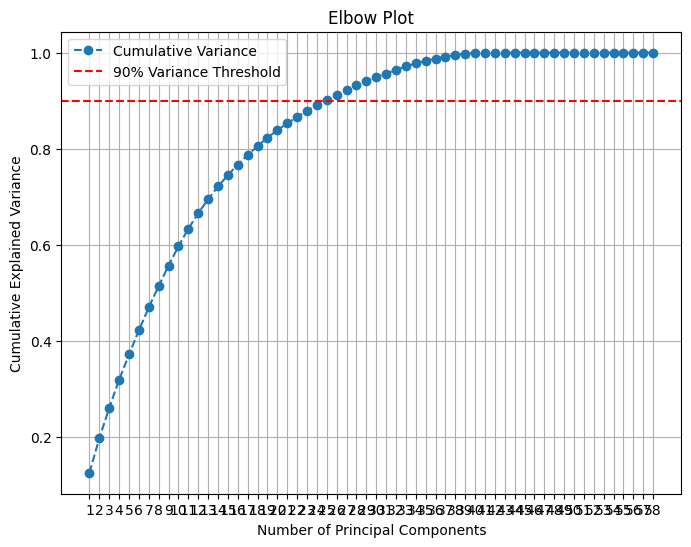


For Subset_32, retain 25 components to explain 90% of the variance.


Explained Variance for Subset_33:
[1.21806887e-01 7.16928939e-02 6.66441219e-02 6.01593399e-02
 5.28719473e-02 5.18438565e-02 4.63530511e-02 4.35118261e-02
 4.18608850e-02 4.06521792e-02 3.65350714e-02 3.37524065e-02
 3.19816566e-02 2.98599269e-02 2.79326945e-02 2.11582281e-02
 2.02731109e-02 1.87041407e-02 1.57782014e-02 1.54452074e-02
 1.38432625e-02 1.24569342e-02 1.17607866e-02 1.12251288e-02
 1.07443064e-02 9.34543965e-03 8.89064078e-03 8.72220862e-03
 8.36026306e-03 8.03041399e-03 7.67661041e-03 7.33680877e-03
 7.19623657e-03 6.02156723e-03 4.98293766e-03 3.99621599e-03
 3.29992080e-03 3.17527019e-03 2.30399219e-03 1.74970828e-03
 6.37153691e-05 1.15226288e-17 8.31182624e-18 5.85712185e-18
 3.86603015e-18 1.25992261e-18 4.77697135e-20 1.39417838e-28
 1.85039860e-35 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

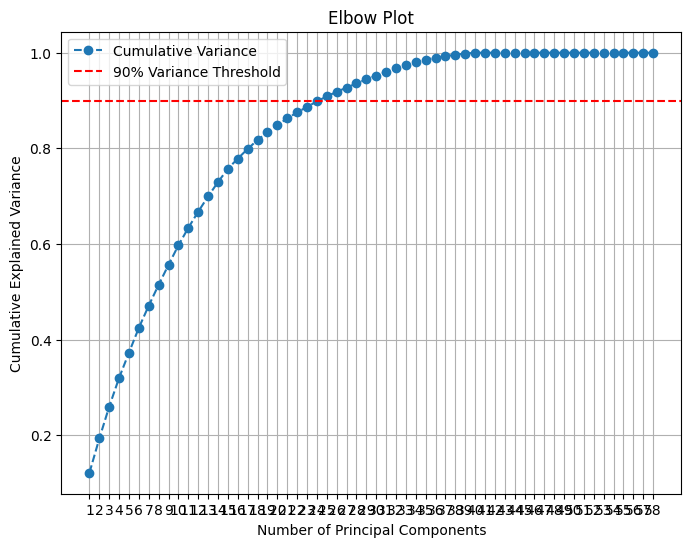


For Subset_33, retain 25 components to explain 90% of the variance.


Explained Variance for Subset_34:
[1.21035986e-01 6.44473966e-02 6.01464496e-02 5.73183109e-02
 4.88380229e-02 4.82749044e-02 4.54321570e-02 4.30479794e-02
 3.98041707e-02 3.56821056e-02 3.46548443e-02 3.32713670e-02
 3.14626252e-02 2.84671053e-02 2.52873527e-02 2.41863105e-02
 2.26990155e-02 1.94631098e-02 1.83166447e-02 1.71350972e-02
 1.58249691e-02 1.56379198e-02 1.46586083e-02 1.37072067e-02
 1.35810806e-02 1.33449549e-02 1.17659461e-02 1.08318798e-02
 9.77426104e-03 9.23825230e-03 8.55388899e-03 7.32856339e-03
 7.00909541e-03 5.87305803e-03 5.11096259e-03 4.71203262e-03
 4.62310878e-03 3.91456798e-03 3.42632975e-03 1.88179101e-03
 2.30567668e-04 1.34674028e-17 1.16144515e-17 7.39356110e-18
 3.16003381e-18 1.68145293e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

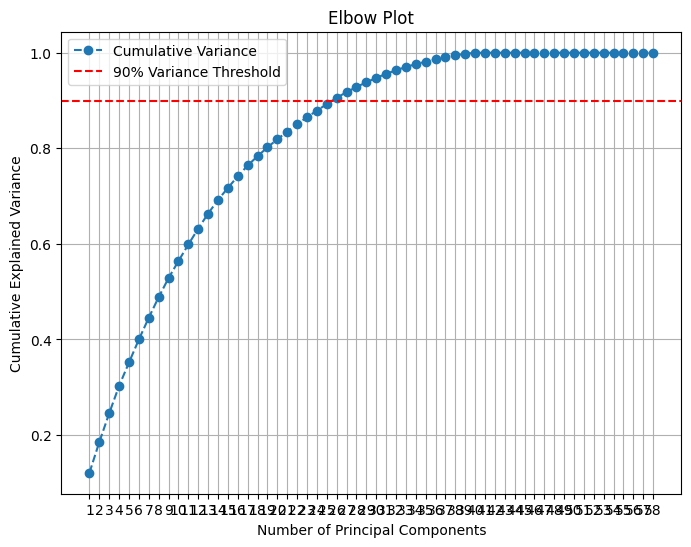


For Subset_34, retain 26 components to explain 90% of the variance.


Explained Variance for Subset_35:
[1.27000939e-01 6.90844814e-02 5.73134434e-02 5.52940922e-02
 5.39955605e-02 4.66920054e-02 4.57370154e-02 4.20957082e-02
 4.03802464e-02 3.71391094e-02 3.49660133e-02 3.42869103e-02
 2.97656138e-02 2.87599724e-02 2.75438035e-02 2.33990868e-02
 2.24474162e-02 2.07159091e-02 1.74391701e-02 1.63317676e-02
 1.49227133e-02 1.47083336e-02 1.38677891e-02 1.30848095e-02
 1.27341758e-02 1.13902921e-02 1.04905221e-02 1.00867665e-02
 8.89773953e-03 8.76929158e-03 8.18314721e-03 7.25766857e-03
 6.80227861e-03 6.25034501e-03 5.82145743e-03 4.25568067e-03
 3.93825813e-03 3.46097868e-03 2.78851464e-03 1.57259622e-03
 3.28377083e-04 1.52129644e-17 1.14213470e-17 5.11199890e-18
 4.62155457e-18 5.40958287e-19 4.70430378e-19 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

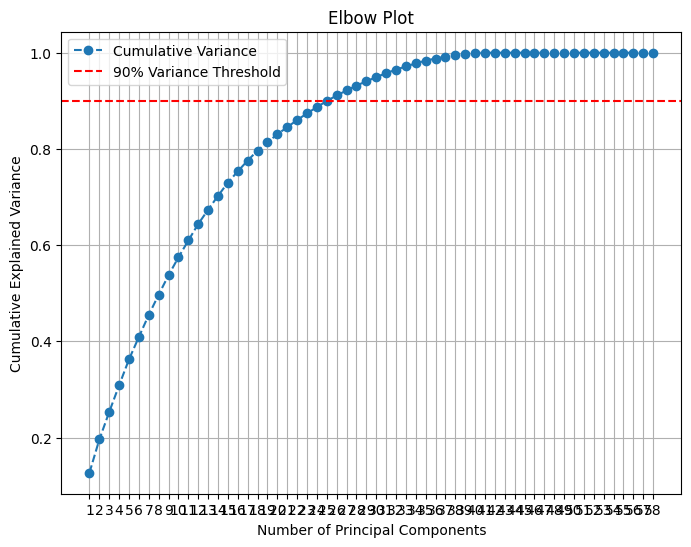


For Subset_35, retain 26 components to explain 90% of the variance.


Explained Variance for Subset_36:
[1.24034413e-01 6.01841110e-02 5.61336518e-02 5.36960613e-02
 4.90353417e-02 4.59868661e-02 4.42962244e-02 4.27666260e-02
 3.95146290e-02 3.50767479e-02 3.25283840e-02 3.06433820e-02
 2.91912332e-02 2.53631242e-02 2.47324236e-02 2.44979484e-02
 2.19320009e-02 2.05818116e-02 1.91634701e-02 1.85824331e-02
 1.76321114e-02 1.74350370e-02 1.71286312e-02 1.64556421e-02
 1.58042764e-02 1.49158178e-02 1.33199336e-02 1.19296232e-02
 1.06359628e-02 1.03381289e-02 9.40647302e-03 8.61513179e-03
 8.02698192e-03 6.51392139e-03 5.35611457e-03 4.31232563e-03
 4.08416629e-03 3.60063167e-03 3.20569524e-03 3.01423373e-03
 3.28277430e-04 1.10929740e-17 6.67990605e-18 2.74799361e-18
 2.44298489e-18 4.63749669e-19 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

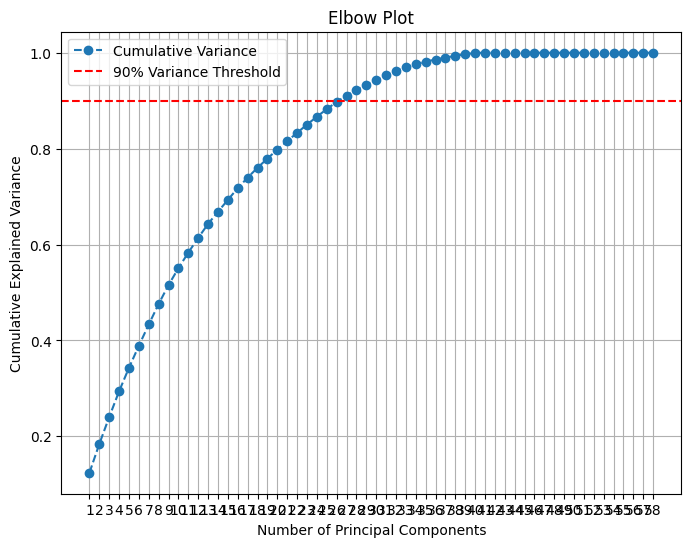


For Subset_36, retain 27 components to explain 90% of the variance.

Subset Subset_37 is empty, skipping PCA.

Explained Variance for Subset_38:
[1.15212259e-01 7.40915294e-02 6.45942070e-02 5.94187724e-02
 5.67850528e-02 5.28130061e-02 4.70174927e-02 4.53514326e-02
 4.11123283e-02 3.90632318e-02 3.77620594e-02 3.47040111e-02
 3.37453214e-02 2.94300680e-02 2.54957908e-02 2.36066141e-02
 2.18419679e-02 1.99467393e-02 1.83504790e-02 1.71930754e-02
 1.65358633e-02 1.37533504e-02 1.26285016e-02 1.23641474e-02
 1.11380091e-02 1.02801949e-02 9.97443228e-03 7.65853193e-03
 7.01560280e-03 6.50541742e-03 6.44184892e-03 5.62201153e-03
 4.59650129e-03 4.41991236e-03 3.78608794e-03 3.39711692e-03
 1.85186871e-03 1.79904051e-03 1.78768164e-03 8.14969317e-04
 9.34712846e-05 1.04208931e-17 1.02991738e-17 4.35824503e-18
 2.65166712e-18 3.61067159e-19 8.54058156e-22 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00


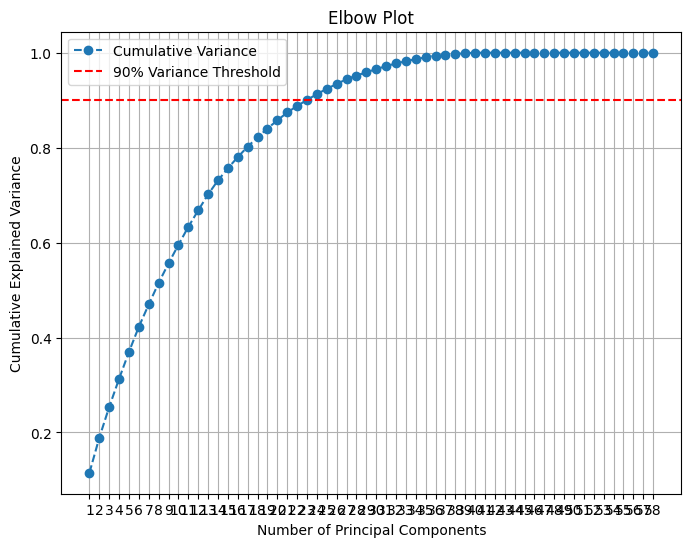


For Subset_38, retain 23 components to explain 90% of the variance.


Explained Variance for Subset_39:
[1.24999863e-01 7.46661557e-02 6.40796642e-02 6.24295934e-02
 5.06074867e-02 4.73008389e-02 4.64090925e-02 4.35188975e-02
 4.17771606e-02 3.95553368e-02 3.61747795e-02 3.58265082e-02
 3.40949429e-02 3.09668584e-02 2.73189115e-02 2.65584623e-02
 2.50144538e-02 2.35695144e-02 1.91549372e-02 1.72327593e-02
 1.43714279e-02 1.38841869e-02 1.11170184e-02 1.02777472e-02
 8.94921485e-03 8.79958822e-03 8.54531199e-03 7.68218480e-03
 6.55269522e-03 6.17965339e-03 5.73378477e-03 4.88300604e-03
 4.71354137e-03 4.62305965e-03 3.42121053e-03 2.69570540e-03
 2.41200075e-03 1.58592124e-03 1.45336724e-03 7.19257436e-04
 1.43900016e-04 8.09480894e-18 5.76021674e-18 3.40738896e-18
 2.80487816e-18 1.27279269e-18 9.70791456e-19 8.14297725e-35
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

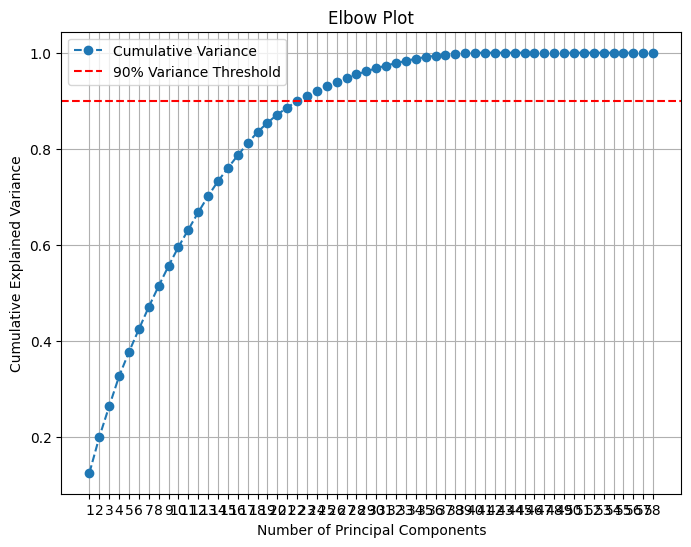


For Subset_39, retain 23 components to explain 90% of the variance.


Explained Variance for Subset_40:
[1.15212259e-01 7.40915294e-02 6.45942070e-02 5.94187724e-02
 5.67850528e-02 5.28130061e-02 4.70174927e-02 4.53514326e-02
 4.11123283e-02 3.90632318e-02 3.77620594e-02 3.47040111e-02
 3.37453214e-02 2.94300680e-02 2.54957908e-02 2.36066141e-02
 2.18419679e-02 1.99467393e-02 1.83504790e-02 1.71930754e-02
 1.65358633e-02 1.37533504e-02 1.26285016e-02 1.23641474e-02
 1.11380091e-02 1.02801949e-02 9.97443228e-03 7.65853193e-03
 7.01560280e-03 6.50541742e-03 6.44184892e-03 5.62201153e-03
 4.59650129e-03 4.41991236e-03 3.78608794e-03 3.39711692e-03
 1.85186871e-03 1.79904051e-03 1.78768164e-03 8.14969317e-04
 9.34712846e-05 1.04208931e-17 1.02991738e-17 4.35824503e-18
 2.65166712e-18 3.61067159e-19 8.54058156e-22 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

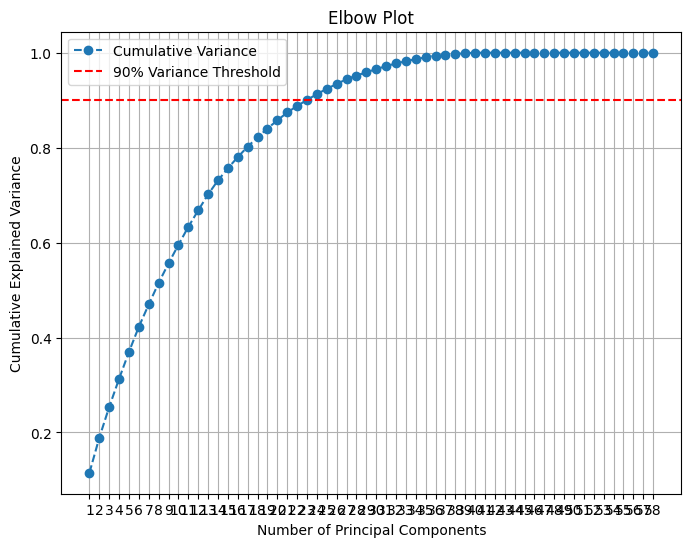


For Subset_40, retain 23 components to explain 90% of the variance.


Explained Variance for Subset_41:
[1.16149562e-01 7.62735637e-02 6.55467779e-02 6.13732857e-02
 5.22829641e-02 4.98021835e-02 4.73116060e-02 4.61105034e-02
 4.40295139e-02 4.02927647e-02 3.71440533e-02 3.65443593e-02
 3.55814432e-02 3.23106052e-02 3.03564575e-02 2.61187984e-02
 2.49253309e-02 2.18587956e-02 1.77613150e-02 1.71099521e-02
 1.28842039e-02 1.27721068e-02 1.19542313e-02 1.01319763e-02
 9.49231101e-03 8.51313500e-03 7.52683415e-03 6.94516912e-03
 6.62432030e-03 6.34672480e-03 5.53906512e-03 4.78625441e-03
 3.36790870e-03 3.25889525e-03 2.69608610e-03 2.50387440e-03
 2.05580711e-03 1.60639818e-03 1.36624056e-03 5.93804714e-04
 1.50817799e-04 1.88858380e-17 1.22780324e-17 8.12175848e-18
 3.96603735e-18 3.94200298e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

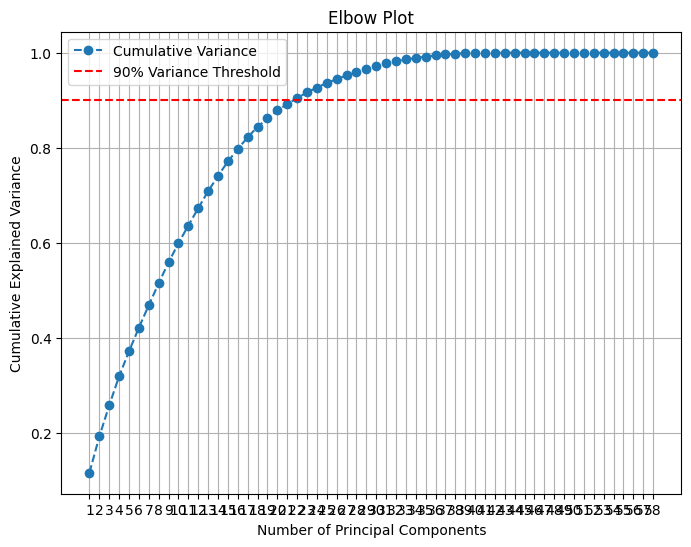


For Subset_41, retain 22 components to explain 90% of the variance.


Explained Variance for Subset_42:
[1.07084292e-01 7.10950876e-02 6.31850198e-02 6.08989601e-02
 5.57906056e-02 4.98587176e-02 4.82348301e-02 4.39101853e-02
 4.16084976e-02 3.92137172e-02 3.53725895e-02 3.39756171e-02
 3.16337174e-02 3.02112168e-02 2.85923740e-02 2.50602156e-02
 2.38658333e-02 2.11279413e-02 1.99393060e-02 1.93676144e-02
 1.89637125e-02 1.56363759e-02 1.38668136e-02 1.18291381e-02
 1.12560620e-02 1.10210953e-02 8.57413035e-03 8.10854501e-03
 7.90959654e-03 6.98674694e-03 6.69954390e-03 6.44857660e-03
 4.68924706e-03 4.30099174e-03 3.48353375e-03 2.86380483e-03
 2.38533813e-03 2.08441610e-03 1.74905055e-03 8.85641255e-04
 2.31301302e-04 8.00340904e-18 7.64813457e-18 2.85462683e-18
 1.83779185e-18 1.70498376e-33 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

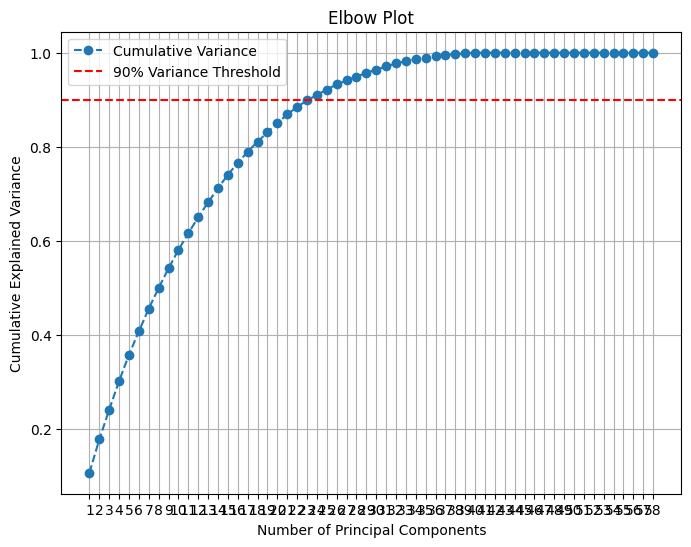


For Subset_42, retain 24 components to explain 90% of the variance.


Explained Variance for Subset_43:
[1.11745912e-01 7.59903804e-02 6.81483070e-02 5.63693465e-02
 5.51305616e-02 5.13204244e-02 4.66975480e-02 4.44047973e-02
 4.32197164e-02 3.75041405e-02 3.69661472e-02 3.57863886e-02
 3.51368126e-02 3.26821326e-02 3.05842104e-02 2.88482351e-02
 2.56860509e-02 2.18619774e-02 1.95731030e-02 1.80809762e-02
 1.40873110e-02 1.28646260e-02 1.25352299e-02 9.50438947e-03
 9.33627861e-03 8.50942136e-03 7.80134742e-03 7.45903007e-03
 7.19061094e-03 5.91670399e-03 5.77307705e-03 5.24008344e-03
 3.57200956e-03 3.07077610e-03 2.94784330e-03 2.25284094e-03
 2.01404920e-03 1.88361469e-03 1.40022080e-03 7.67266904e-04
 1.36100731e-04 1.25116190e-17 1.02369012e-17 6.06668398e-18
 3.83136017e-18 2.69208363e-18 7.41924558e-19 2.21064736e-32
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

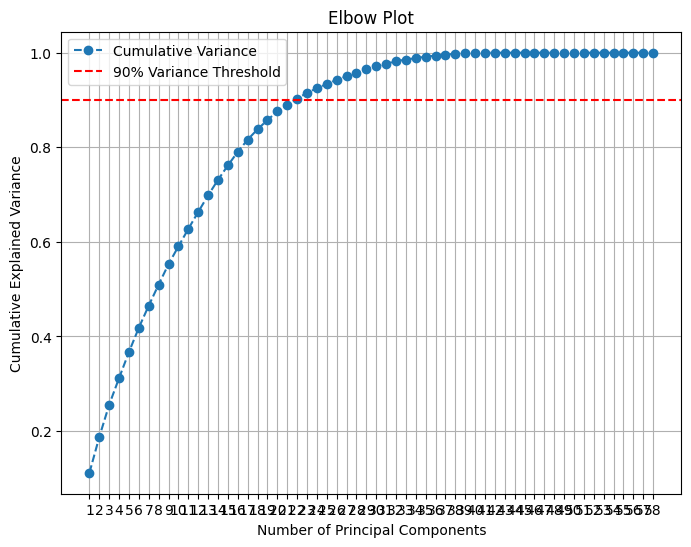


For Subset_43, retain 22 components to explain 90% of the variance.


Explained Variance for Subset_44:
[1.09042586e-01 6.82886594e-02 6.33321665e-02 5.84234145e-02
 5.03916261e-02 4.91598973e-02 4.74514460e-02 4.48518836e-02
 4.26168541e-02 3.54576686e-02 3.39985041e-02 3.27789121e-02
 2.97075150e-02 2.92439437e-02 2.67190625e-02 2.59531654e-02
 2.44382069e-02 2.36654204e-02 2.22673202e-02 1.95160341e-02
 1.87465247e-02 1.75899898e-02 1.53650315e-02 1.36264411e-02
 1.25764379e-02 1.18421612e-02 1.00107275e-02 9.50517195e-03
 8.09973733e-03 7.79762942e-03 7.43463360e-03 5.29825728e-03
 5.21656615e-03 4.96312706e-03 4.10099499e-03 2.79000018e-03
 2.52404221e-03 2.32147569e-03 1.45033163e-03 1.24740655e-03
 1.89025794e-04 1.24261195e-17 7.19215442e-18 4.49753456e-18
 2.31986358e-18 3.36706437e-19 1.24151069e-19 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

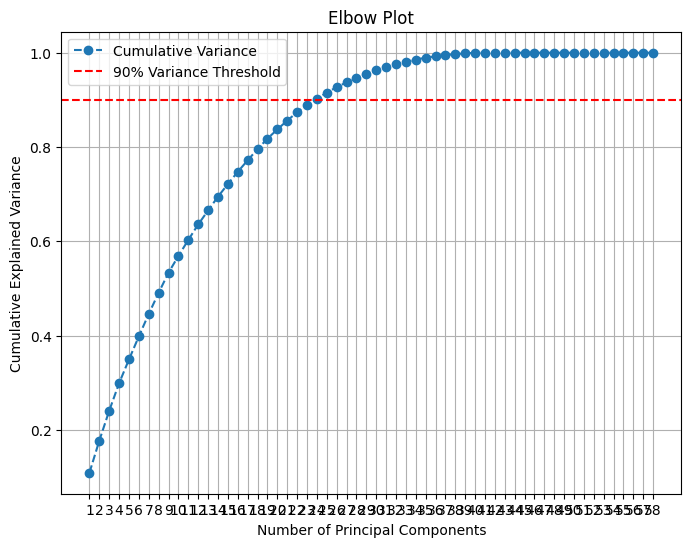


For Subset_44, retain 24 components to explain 90% of the variance.


Explained Variance for Subset_45:
[1.12189407e-01 7.46229911e-02 6.41708581e-02 5.69630748e-02
 5.19207917e-02 5.05512350e-02 4.64849703e-02 4.31047197e-02
 3.90934531e-02 3.88591856e-02 3.77645323e-02 3.62400382e-02
 3.30437568e-02 3.16053491e-02 3.09064595e-02 2.79366351e-02
 2.59892457e-02 2.50202000e-02 1.97954736e-02 1.54152828e-02
 1.48748455e-02 1.35860116e-02 1.28349182e-02 1.12890077e-02
 1.03366087e-02 9.07200094e-03 8.43837268e-03 8.04564925e-03
 7.63593147e-03 7.09640819e-03 6.35330746e-03 5.70975517e-03
 4.68368341e-03 4.35061739e-03 3.83144501e-03 2.97729026e-03
 2.48721822e-03 1.93798595e-03 1.86805492e-03 8.26234172e-04
 8.69940494e-05 8.33594892e-18 6.73762438e-18 4.82674052e-18
 2.73487032e-18 1.00466783e-18 6.43631507e-34 1.04317370e-34
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

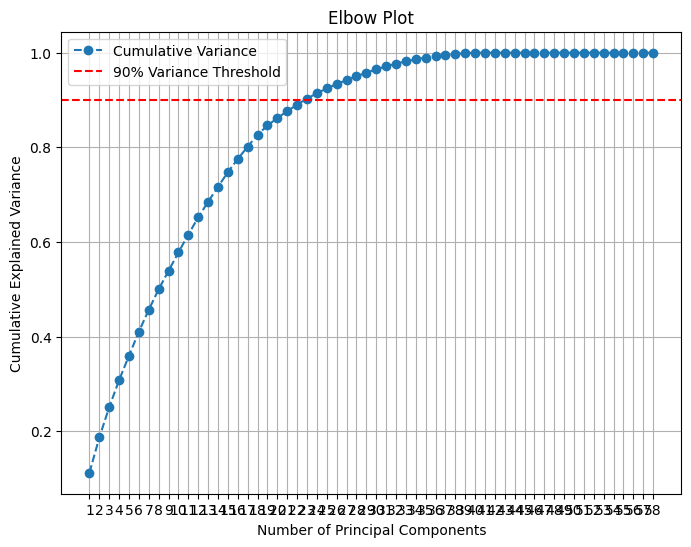


For Subset_45, retain 23 components to explain 90% of the variance.


Explained Variance for Subset_46:
[1.06625606e-01 6.78163406e-02 6.05245691e-02 5.52464093e-02
 4.90700607e-02 4.73804839e-02 4.61763441e-02 4.41887237e-02
 4.28248831e-02 3.70011270e-02 3.40880902e-02 3.11411439e-02
 2.96890620e-02 2.90727832e-02 2.86364580e-02 2.68338554e-02
 2.50880464e-02 2.22475359e-02 2.18129801e-02 2.02295508e-02
 1.90955406e-02 1.74983614e-02 1.53763997e-02 1.40680323e-02
 1.30820565e-02 1.23654207e-02 1.16992124e-02 1.03679094e-02
 9.09723092e-03 8.79639625e-03 7.88382906e-03 6.88209564e-03
 6.31009615e-03 6.24220284e-03 3.78304014e-03 3.41143506e-03
 3.02791661e-03 2.01735893e-03 1.93545519e-03 1.00923164e-03
 3.56725049e-04 2.60458981e-17 1.72724921e-17 1.11172814e-17
 3.03594810e-18 2.61560103e-18 1.04889215e-18 3.96285047e-19
 1.79058804e-19 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

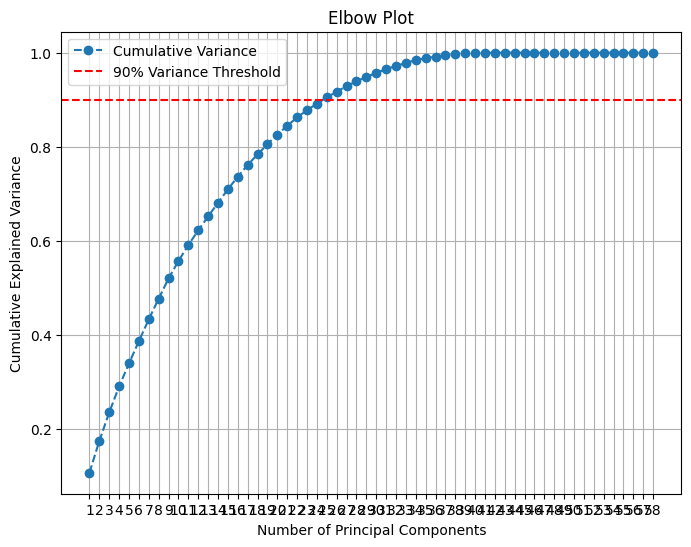


For Subset_46, retain 25 components to explain 90% of the variance.


Explained Variance for Subset_47:
[1.21894863e-01 6.96953667e-02 5.61143966e-02 5.43775307e-02
 5.13030591e-02 5.06548657e-02 4.86555820e-02 4.30755996e-02
 4.05329387e-02 3.74858698e-02 3.64705970e-02 3.51511976e-02
 3.21916765e-02 3.13854797e-02 3.04828890e-02 2.68597835e-02
 2.65904458e-02 2.52971281e-02 2.06176543e-02 1.66919402e-02
 1.56821273e-02 1.36448586e-02 1.29036500e-02 1.23637462e-02
 1.18808380e-02 1.03469127e-02 9.28595151e-03 8.64412173e-03
 8.06206756e-03 7.33528822e-03 6.41012578e-03 5.05211898e-03
 4.63012902e-03 4.13329831e-03 3.78323558e-03 2.46392282e-03
 2.17000485e-03 1.95072056e-03 1.90266234e-03 1.43976942e-03
 3.85586939e-04 1.40650247e-17 7.52159726e-18 4.66042631e-18
 3.51428468e-18 3.00444181e-18 1.50895195e-18 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

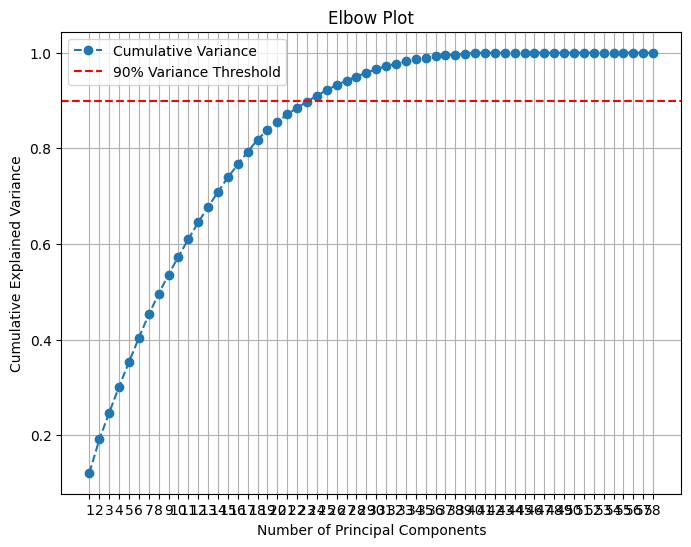


For Subset_47, retain 24 components to explain 90% of the variance.


Explained Variance for Subset_48:
[1.07552327e-01 6.50076831e-02 5.81394019e-02 5.61081327e-02
 4.82805926e-02 4.67243974e-02 4.61004697e-02 4.40963556e-02
 4.28746026e-02 3.76901483e-02 3.56974498e-02 2.90501685e-02
 2.85515724e-02 2.80648450e-02 2.70032044e-02 2.54770403e-02
 2.47179511e-02 2.40265983e-02 2.20972109e-02 2.09939181e-02
 1.94414992e-02 1.78501039e-02 1.64732551e-02 1.49875797e-02
 1.41356512e-02 1.29913003e-02 1.23522269e-02 1.10644207e-02
 9.94331237e-03 9.22575543e-03 7.74927211e-03 7.31761719e-03
 6.22816393e-03 5.37912496e-03 4.82607907e-03 3.73613548e-03
 2.52498141e-03 2.02916975e-03 1.91588682e-03 1.37513527e-03
 1.99260188e-04 1.31929325e-17 1.04029417e-17 7.16787412e-18
 3.36210395e-18 3.09498531e-18 2.84116191e-18 1.24525441e-18
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Cumulati

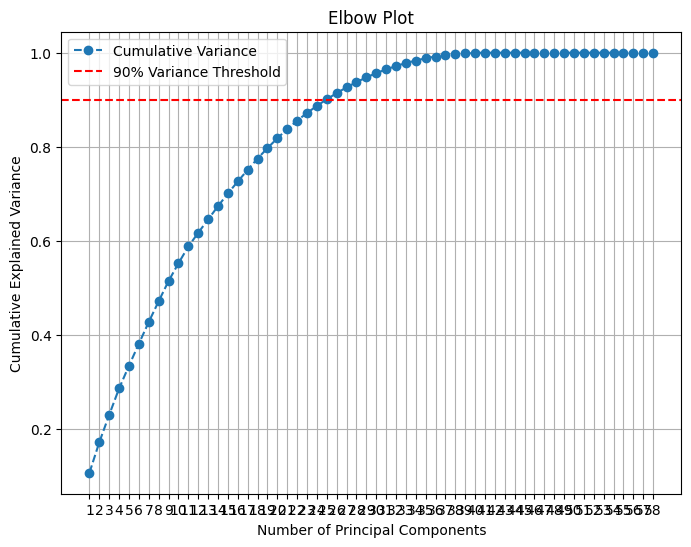


For Subset_48, retain 25 components to explain 90% of the variance.



In [17]:
n_components_selected_dict = {}  # Store the number of components selected for each subset
pca_results = {}  # Store the PCA results for each subset

# Loop through the list of subsets and apply PCA to each one
for idx, subset in enumerate(subsets):
    subset_name = f"Subset_{idx+1}"  # Create a dynamic name for the subset
    
    # Check if the subset is empty
    if subset.empty:
        print(f"Subset {subset_name} is empty, skipping PCA.")
        continue  # Skip this subset if it's empty

    # Apply PCA with all components
    pca_result, explained_variance, pca_model = apply_pca(subset)
    
    # Calculate cumulative variance
    cumulative_variance = np.cumsum(explained_variance)
    
    # Convert pca_result to a DataFrame with column names like PC1, PC2, etc.
    pca_result_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

    # Store results in the dictionary, including the PCA model
    pca_results[subset_name] = {
        'PCA Result': pca_result_df,
        'Explained Variance': explained_variance,
        'PCA Model': pca_model  # Store the PCA model here
    }

    # Display explained variance ratio and cumulative variance
    print(f"\nExplained Variance for {subset_name}:")
    print(explained_variance)
    print(f"\nCumulative Variance for {subset_name}:")
    print(cumulative_variance)
    
    # Display the loadings (component loadings) from the PCA model
    loadings = pd.DataFrame(pca_model.components_.T,  # Transpose to match features
                            columns=[f'PC{i+1}' for i in range(pca_result_df.shape[1])],
                            index=subset.columns)  # Use original subset columns for loadings
    print(f"\nLoadings for {subset_name}:")
    print(loadings)

    # Display the transformed data (PCA results)
    print(f"\nPCA Results for {subset_name}:")
    print(pca_result_df.head())

    # Visualize PCA results

    # Elbow plot (cumulative variance)
    plot_elbow(cumulative_variance)

    # Decide the number of components to retain based on 90% variance threshold
    n_components_selected = np.argmax(cumulative_variance >= 0.9) + 1
    
    #Store the number of components selected
    n_components_selected_dict[subset_name] = n_components_selected

    print(f"\nFor {subset_name}, retain {n_components_selected} components to explain 90% of the variance.\n")


### Calculate the average number of principle components across all subgroups needed to retain 90% variance 

Average number of Principal Components selected to reach the 90% variance threshold: 23.61


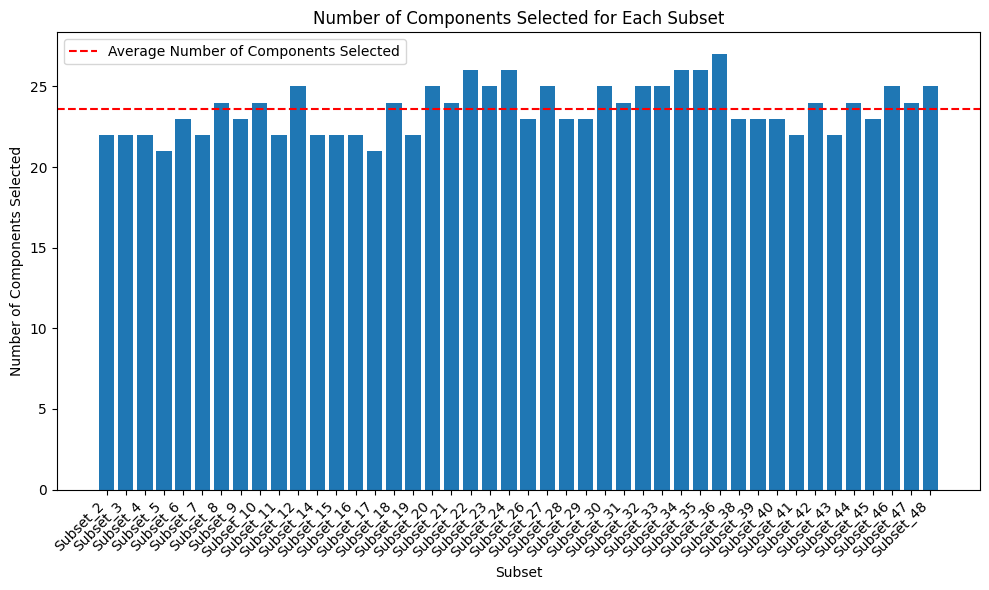

In [18]:
# Calculate the average number of Principal Components selected to reach the 90% variance threshold
average_n_components = np.mean(list(n_components_selected_dict.values()))
print(f"Average number of Principal Components selected to reach the 90% variance threshold: {average_n_components:.2f}")

# Plot the number of Principal Components selected to reach the 90% variance threshold
plt.figure(figsize=(10, 6))  # Slightly increase figure width for better spacing
plt.bar(range(len(n_components_selected_dict)), list(n_components_selected_dict.values()), align='center')
plt.xticks(
    range(len(n_components_selected_dict)),
    list(n_components_selected_dict.keys()),
    rotation=45,  # Rotate labels for better spacing
    ha='right',   # Align labels to the right
    fontsize=10   # Decrease font size for readability
)
plt.axhline(y=average_n_components, color='r', linestyle='--', label='Average Number of Components Selected')
plt.xlabel('Subset')
plt.ylabel('Number of Components Selected')
plt.title('Number of Components Selected for Each Subset')
plt.legend()
plt.tight_layout()  # Automatically adjust layout for better spacing
plt.show()



In [19]:
#Display the subset with the lowest selected number of components
min_subset = min(n_components_selected_dict, key=n_components_selected_dict.get)
min_subset_n_components = n_components_selected_dict[min_subset]
print(f"Subset with the lowest number of components selected: {min_subset} with {min_subset_n_components} components.")


Subset with the lowest number of components selected: Subset_5 with 21 components.


In [20]:
#Display the subset with the highest selected number of components
max_subset = max(n_components_selected_dict, key=n_components_selected_dict.get)
max_subset_n_components = n_components_selected_dict[max_subset]
print(f"Subset with the highest number of components selected: {max_subset} with {max_subset_n_components} components.")


Subset with the highest number of components selected: Subset_36 with 27 components.


### Identify the features that contribute the most to explaining the varience for each subset based on the number of principle components needed to explain 90% of the varience. 

In [21]:
# Dictionary to store top features and their cumulative loadings for each subset
top_features_by_subset = {}

# Loop through PCA results for each subset
for idx, (subset_name, results) in enumerate(pca_results.items()):
    # Extract the PCA model and loadings
    pca_model = results['PCA Model']
    loadings = pd.DataFrame(
        pca_model.components_.T,  # Transpose to align features with components
        columns=[f'PC{i+1}' for i in range(pca_model.n_components_)],
        index=subsets[idx].columns  # Use the correct subset's columns
    )
    
    # Get the number of components needed to reach the 90% variance threshold for this subset
    n_components_selected = n_components_selected_dict.get(subset_name, None)
    
    if n_components_selected is None:
        print(f"{subset_name}: No components specified in n_components_selected_dict, skipping.")
        continue
    
    # Ensure there are enough components in the PCA model
    if loadings.shape[1] < n_components_selected:
        print(f"{subset_name}: Only {loadings.shape[1]} components exist, skipping.")
        continue

    # Select the required number of components
    selected_loadings = loadings.iloc[:, :n_components_selected]
    
    # Calculate cumulative loadings (sum of absolute values across the selected PCs)
    cumulative_loadings = selected_loadings.abs().sum(axis=1)
    
    # Find the top 3 features based on cumulative loadings
    top_features = cumulative_loadings.sort_values(ascending=False).head(3)
    
    # Store the top features and their cumulative loadings
    top_features_by_subset[subset_name] = top_features

    # Display the top features for the subset
    print(f"\nTop features for {subset_name} (based on cumulative loadings across {n_components_selected} PCs):")
    print(top_features)

# Convert results into a DataFrame for visualization
top_features_df = pd.DataFrame(top_features_by_subset)



Top features for Subset_2 (based on cumulative loadings across 22 PCs):
NoDocbcCost      3.330283
Smoker           3.312047
AnyHealthcare    3.055653
dtype: float64

Top features for Subset_3 (based on cumulative loadings across 22 PCs):
AnyHealthcare    3.272323
NoDocbcCost      3.163150
MentHlth_1-5     3.108367
dtype: float64

Top features for Subset_4 (based on cumulative loadings across 22 PCs):
NoDocbcCost      3.330283
Smoker           3.312047
AnyHealthcare    3.055653
dtype: float64

Top features for Subset_5 (based on cumulative loadings across 21 PCs):
AnyHealthcare             3.216485
Income_$75,000 or more    3.196585
HighBP                    3.105986
dtype: float64

Top features for Subset_6 (based on cumulative loadings across 23 PCs):
NoDocbcCost     3.769211
PhysActivity    3.322773
Veggies         3.295772
dtype: float64

Top features for Subset_7 (based on cumulative loadings across 22 PCs):
AnyHealthcare    3.287364
NoDocbcCost      3.233988
HighChol         3.19

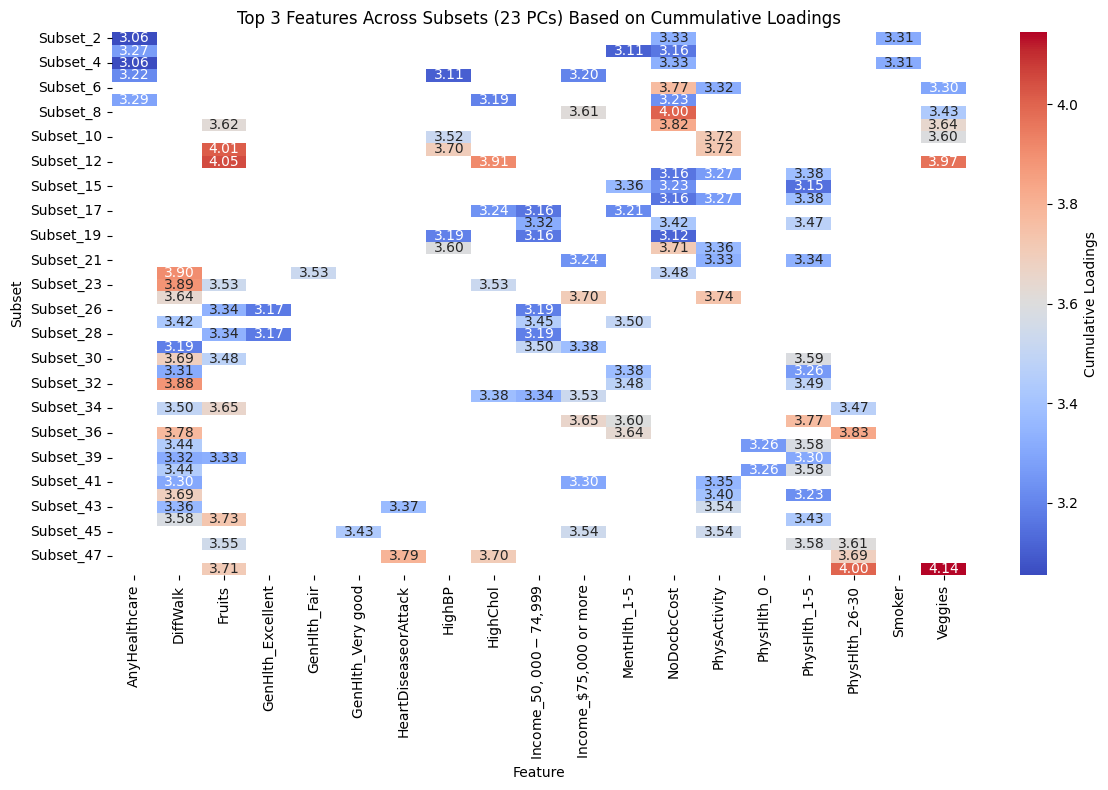

In [22]:
# Visualization: Heatmap of Top Features Across Subsets
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(top_features_df.T, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Cumulative Loadings'})
plt.title('Top 3 Features Across Subsets (23 PCs) Based on Cummulative Loadings')
plt.ylabel('Subset')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()